<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="power.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Cardiovascular Disease Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement 

Readings of patients are given and the objective is to build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.
People with high readings of CVD factors owith high risk of Cardiovascular disease need early detection and management where  machine learning models can be of great help.

##  Data Definition 

The dataset represents features features of patients. The data definition is as follow:
----Age: Age of the patient (integer)

----Height: Height of a person in cm (interger)

----Weigh:Weight of a patient in Kg (float)

----Gender:gender of the patient (categorical code) ***1-women,2-men***

----Systolic blood pressure: ap_hi (int)

----Diastolic blood pressure:  ap_lo  (int)

----Cholesterol: cholesterol ***1: normal, 2: above normal, 3: well above normal***

----Glucose:glucose levels  ***1: normal, 2: above normal, 3: well above normal***

----Smoking: whether a patient smokes or not (binary) ***1-smokes,2-doesn't smoke***

----Alcohol intake: whether a patient consumes alochol or not (binary)***1-alcoholic,2-non-alcoholic***

----Physical activity: whether the patient actively participates in physical activity or not (binary) ***1-does physical activity,2-doesnt do physical activity***

----Presence or absence of cardiovascular disease: Target variable(binary) ***1-Presence of the disease,2-Absence of the disease***

## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[Read Data](#load_data)**
3. **[Exploratory Data Analysis](#EDA)**
   - 3.1 - [Understand the Dataset](#Understanding_Variables)
   - 3.2 - [Data Type](#change_datatype)
   - 3.3 - [Distribution of Variables](#dis)
   - 3.4 - [Feature-Engineering](#fea)
   - 3.5 - [Univariate Analysis](#out)
   - 3.6 - [Bivariate Analysis](#mul)
   - 3.7 - [Summary Statistics ](#stat)
   - 3.8 - [Missing Values](#missing_values)
   - 3.9 - [Prepare the Data](#preparation_of_data)
4. **[Classification Models](#Logit)**
    - 4.1 - [Build the Base model-Logistic Regressiom](#base)
    - 4.2 - [Decision tree classifier](#tree)
    - 4.3 - [Random forest](#forest)
    - 4.4 - [K-Nearest Neighbors](#knn)
    - 4.5 - [Naive Bayes](#Naive)
    - 4.6 - [Adaptive Boosting](#ada)
    - 4.7 - [Gradient Boosting Classifer](#gra)
    - 4.8 - [XGBoost classifier](#XG)
    - 4.9 - [Support vector Machine](#svm)

<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import the required libraries and functions.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15,8]
np.set_printoptions(suppress=True)
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 
!pip install xgboost
# import the XGBoost function for classification
from xgboost import XGBClassifier

<a id='load_data'></a>
# 2. Read Data

In [2]:
df=pd.read_csv('Capstone data.csv',sep=',')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


<a id='EDA'></a>
# 3. Exploratory Data Analysis

<a id='Understanding_Variables'></a>
## 3.1 Understand the Dataset

#### Dimensions of the data

In [3]:
df.shape

(70000, 13)

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> There are 70000 observations and 13 columns in the dataset. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='change_datatype'></a>
## 3.2 Data Type

**1. Check for the data type**

In [4]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
# convert the column gender to object type
df['gender'] = df['gender'].astype(object)

# convert the column cholesterol to object type
df['cholesterol'] = df['cholesterol'].astype(object)

# convert the column glucose to object type
df['gluc'] = df['gluc'].astype(object)

# convert the column smoke to object type
df['smoke'] = df['smoke'].astype(object)

# convert the column alcohol to object type
df['alco'] = df['alco'].astype(object)

# convert the column active to object type
df['active'] = df['active'].astype(object)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Explicit type casting has been done to the variables which are in the form of int instead of object,but the target variable is not coverted</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='dis'></a>
## 3.3 Distribution of Variables

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Check the distribution of all the variables.
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

There are variables of types continous and categorical, we plot the boxplot for each continous variable to check the distribution. Also, we can use these boxplots to identify the outliers in the variables.We plot countplot for the categorical data to get the count of the categories

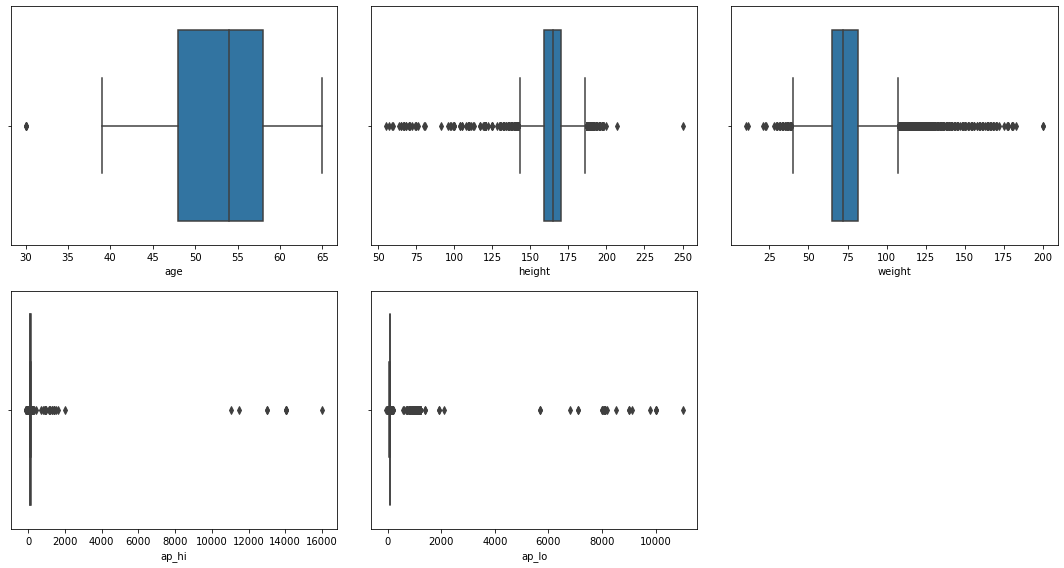

In [6]:
data=df[['age','height','weight','ap_hi','ap_lo']]
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))
for variable, subplot in zip(data.columns, ax.flatten()):   
    sns.boxplot(df[variable], ax = subplot)

plt.tight_layout()
fig.delaxes(ax[1][2])
plt.show()

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The above boxplots show that the variables 'ap_hi' and 'ap_lo' are not normally distributed, and the other variables are near normally distributed. <br><br> Also, it can be easily seen that all the variables have outliers. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

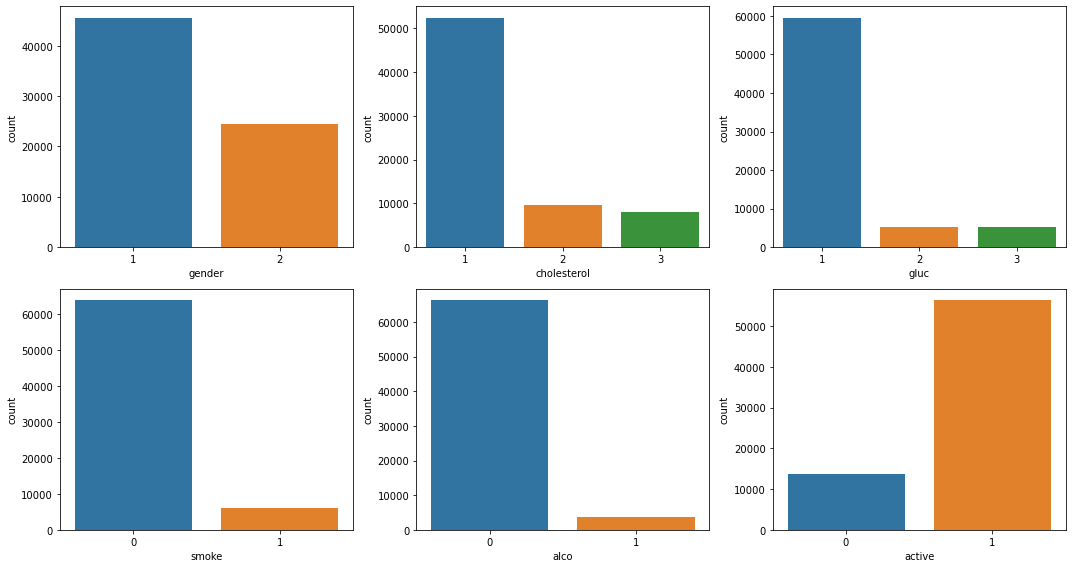

In [7]:
cat=df[['gender','cholesterol','gluc','smoke','alco','active']]
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))
for variable, subplot in zip(cat.columns, ax.flatten()):   
    sns.countplot(df[variable], ax = subplot)

plt.tight_layout()

plt.show()

<AxesSubplot:xlabel='cardio', ylabel='count'>

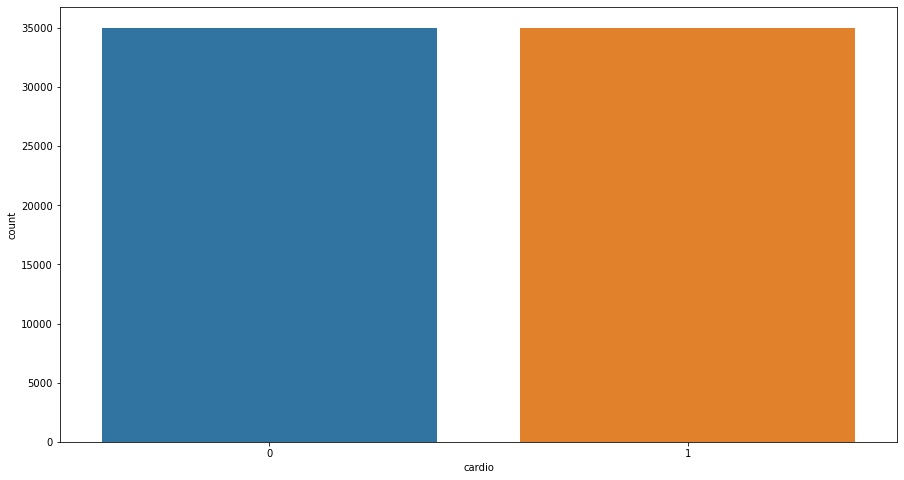

In [8]:
sns.countplot(df['cardio'])

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The above barplots/countplots give the count of the labels in the data.The target variable cardio has almost equal count
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='fea'></a>
## 3.4 Feature Engineering

In [9]:
df['BMI']= round(df['weight']/((df['height']/100)**2),2)

In [10]:
df['gender']=df['gender']%2

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>New column "BMI"-Body Mass Index is created with height and weight variables and gender columns values are turned to 0 and 1
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='out'></a>
## 3.5 Univariate Analysis

In [11]:
#Age
df['age'].describe()

count    70000.000000
mean        53.338686
std          6.765294
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age, dtype: float64

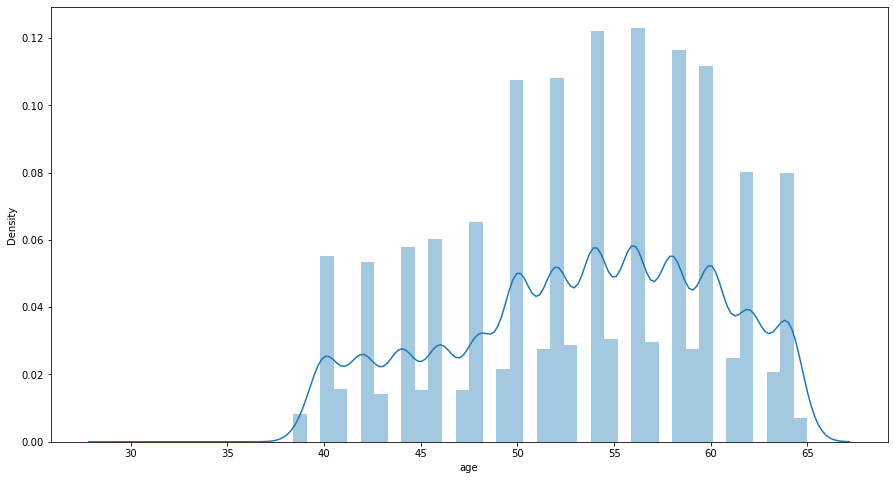

In [12]:
sns.distplot(df['age'])
plt.show()

In [13]:
df.age.skew()

-0.3064444003581895

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The skewness is almost 0 then we can say that age variable is normally distributed
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='age'>

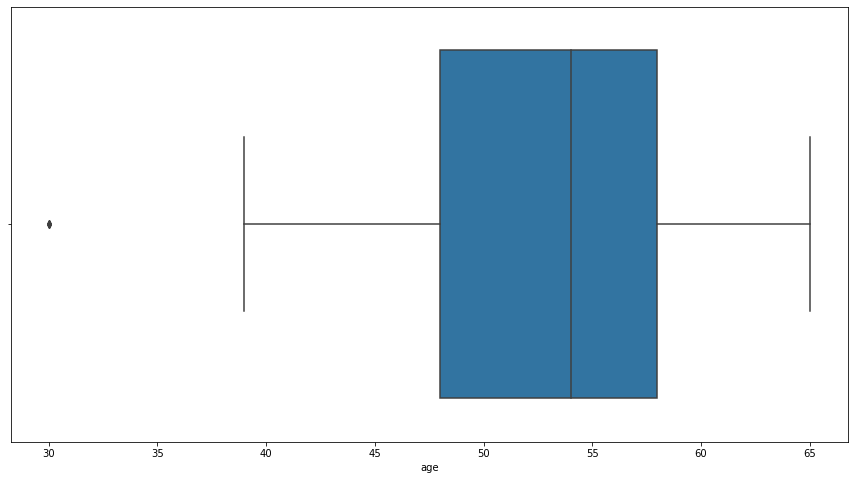

In [14]:
sns.boxplot(df.age)

In [15]:
Q1 = df.age.quantile(0.25) 
Q3 = df.age.quantile(0.75)
IQR = Q3 - Q1
UT = Q3 + 1.5*IQR
LT = Q1 - 1.5*IQR
df = df[(df.age < UT) & (df.age > LT)]
df.shape

(69996, 14)

In [16]:
df['age'].describe()

count    69996.000000
mean        53.340019
std          6.763186
min         39.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

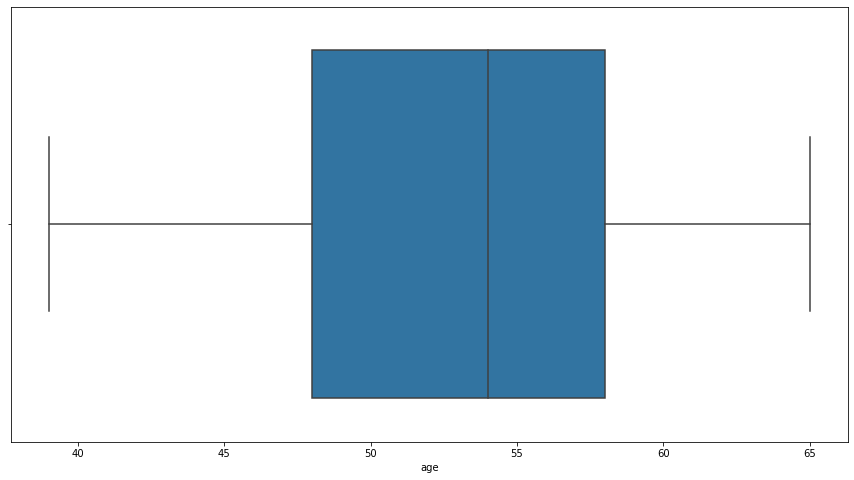

In [17]:
sns.boxplot(df.age)

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The outliers have been removed from the age variable
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
df.height.describe()

count    69996.000000
mean       164.359063
std          8.210122
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

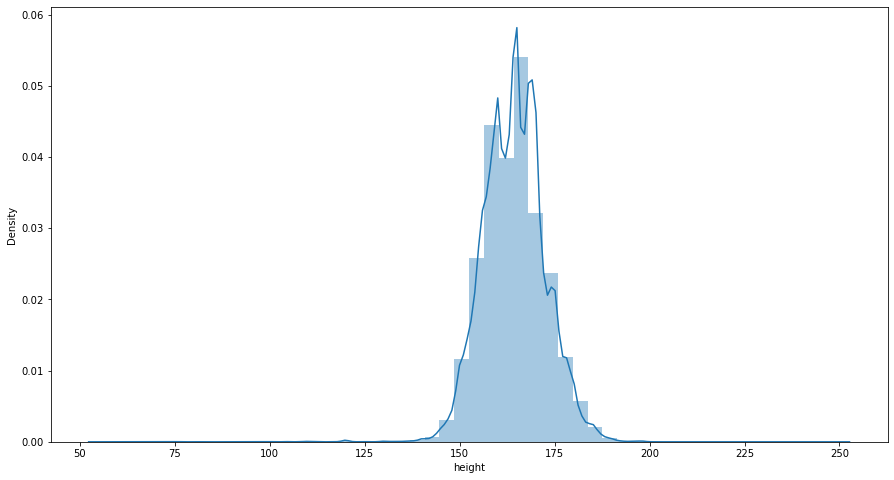

In [19]:
sns.distplot(df['height'])
plt.show()

In [20]:
df.height.skew()

-0.642220812648738

<AxesSubplot:xlabel='height'>

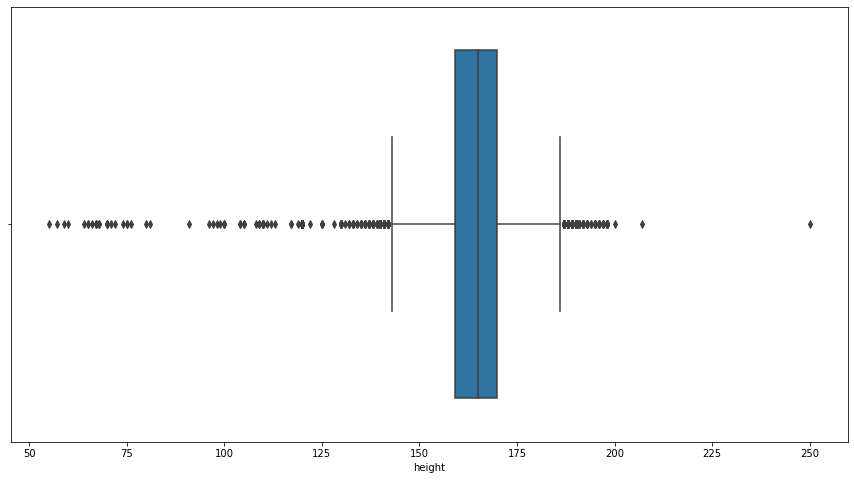

In [21]:
sns.boxplot(df.height)

In [22]:
Q1 = df.height.quantile(0.25) 
Q3 = df.height.quantile(0.75)
IQR = Q3 - Q1
UT = Q3 + 1.5*IQR
LT = Q1 - 1.5*IQR
df = df[(df.height < UT) & (df.height > LT)]
df.shape

(69477, 14)

In [23]:
df['height'].describe()

count    69477.000000
mean       164.400305
std          7.621175
min        143.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        186.000000
Name: height, dtype: float64

<AxesSubplot:xlabel='height'>

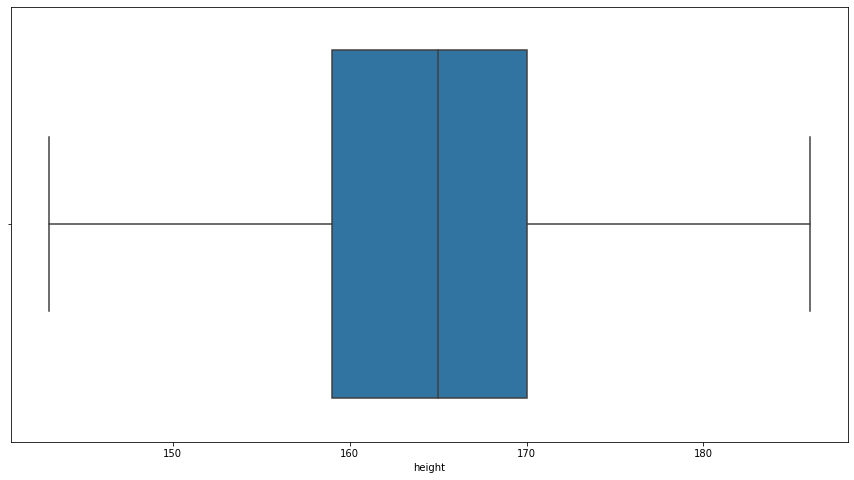

In [24]:
sns.boxplot(df.height)

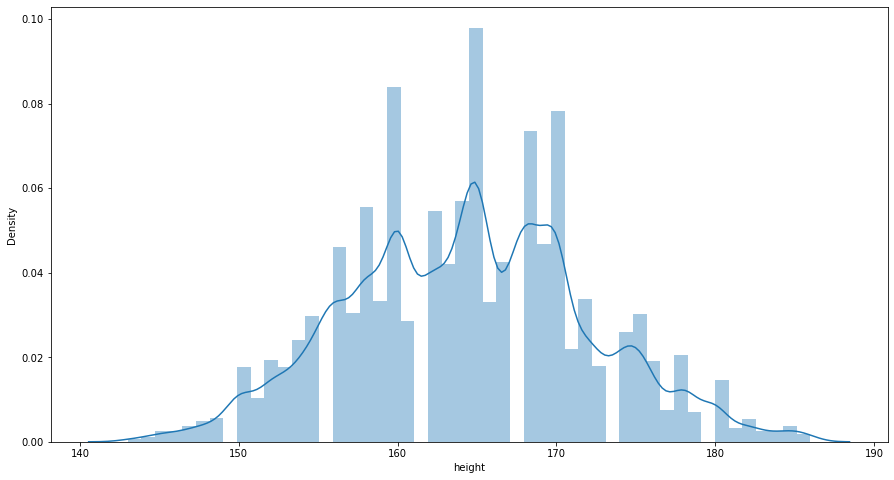

In [25]:
sns.distplot(df['height'])
plt.show()

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The height variable is slightly negatively skewed and has alot of outliers. After removing the outliers the variable seems normal and 523 values have been removed 
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
df.weight.describe()

count    69477.000000
mean        74.152953
std         14.287850
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

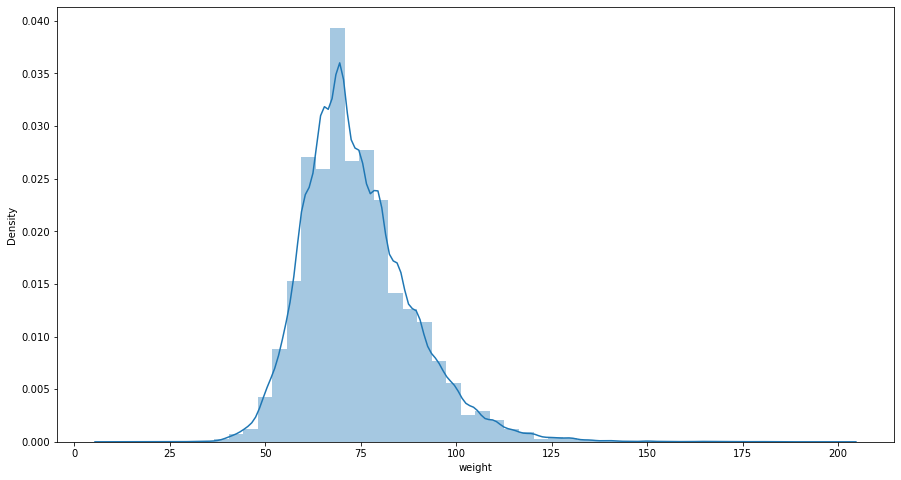

In [27]:
sns.distplot(df.weight)
plt.show()

In [28]:
df.weight.skew()

0.9838042756555513

<AxesSubplot:xlabel='weight'>

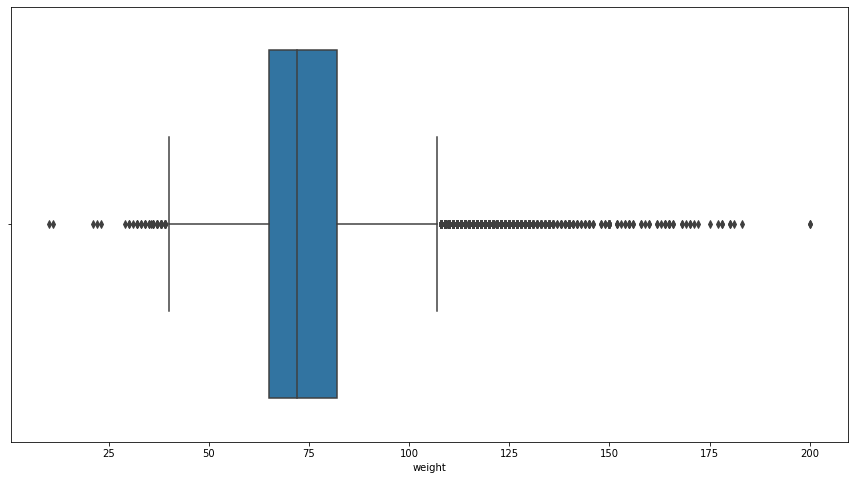

In [29]:
sns.boxplot(df.weight)

In [30]:
Q1 = df.weight.quantile(0.25) 
Q3 = df.weight.quantile(0.75)
IQR = Q3 - Q1
UT = Q3 + 1.5*IQR
LT = Q1 - 1.5*IQR
df = df[df.weight > LT]
df.shape

(69432, 14)

In [31]:
df['weight'].describe()

count    69432.000000
mean        74.179100
std         14.254489
min         40.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

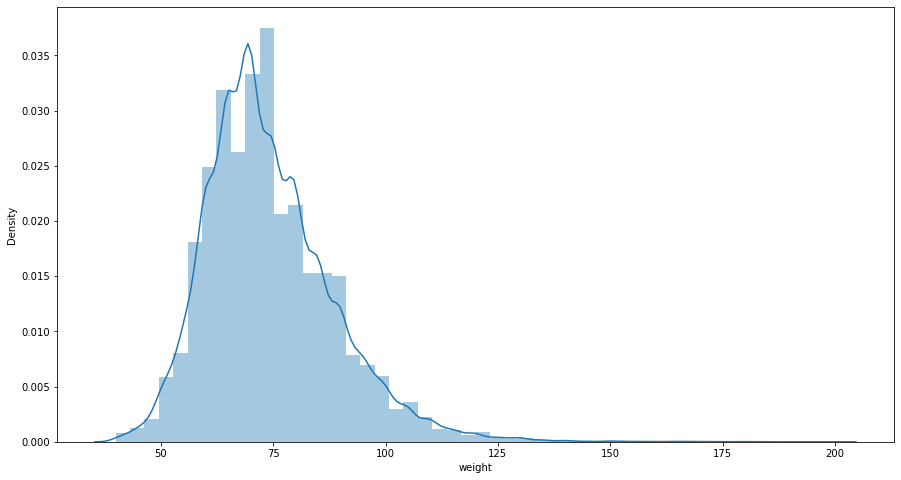

In [32]:
sns.distplot(df.weight)
plt.show()

<AxesSubplot:xlabel='weight'>

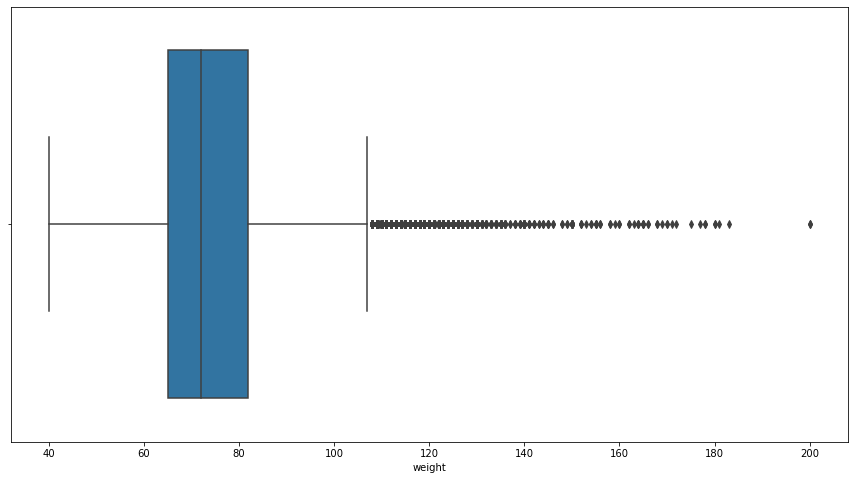

In [33]:
sns.boxplot(df.weight)

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The weight variable is positively skewed and has alot of outliers. The upper limit of weight is important for the analysis so only the lower limit values are droppped.45 outlier values have been removed 
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
df.ap_hi.describe()

count    69432.000000
mean       128.841687
std        154.628393
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

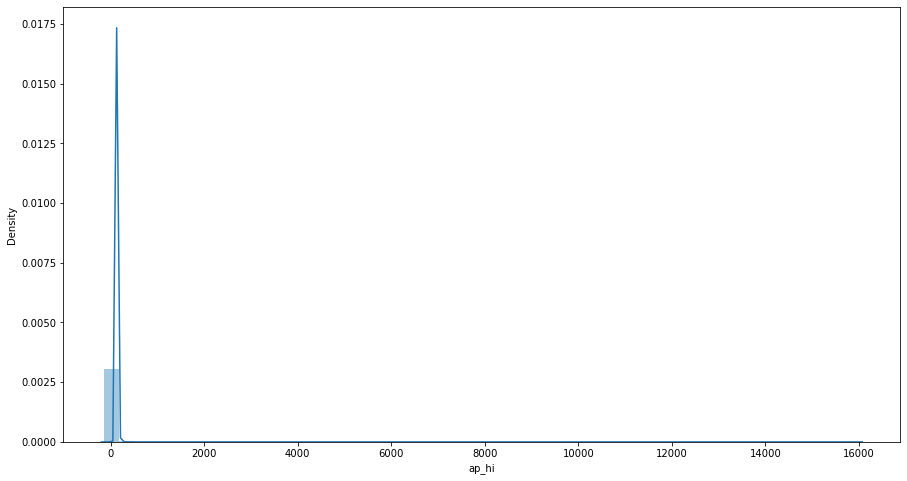

In [35]:
sns.distplot(df.ap_hi)
plt.show()

In [36]:
df.ap_hi.skew()

84.96832065532593

<AxesSubplot:xlabel='ap_hi'>

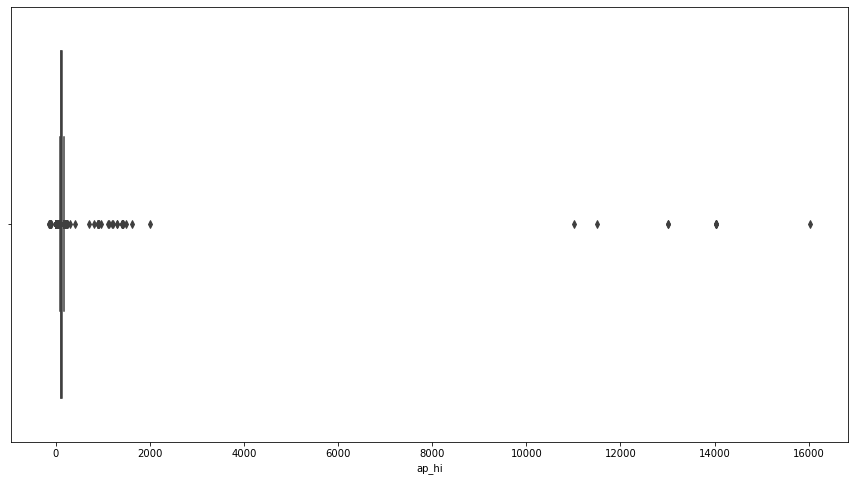

In [37]:
sns.boxplot(df.ap_hi)

In [38]:
Q1 = df.ap_hi.quantile(0.25) 
Q3 = df.ap_hi.quantile(0.75)
IQR = Q3 - Q1
UT = Q3 +  3*IQR
LT = Q1 - 1.5*IQR
df = df[(df.ap_hi<UT) & (df.ap_hi > LT)]
df.shape

(67940, 14)

In [39]:
df.ap_hi.describe()


count    67940.000000
mean       127.424684
std         16.041291
min         93.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        199.000000
Name: ap_hi, dtype: float64

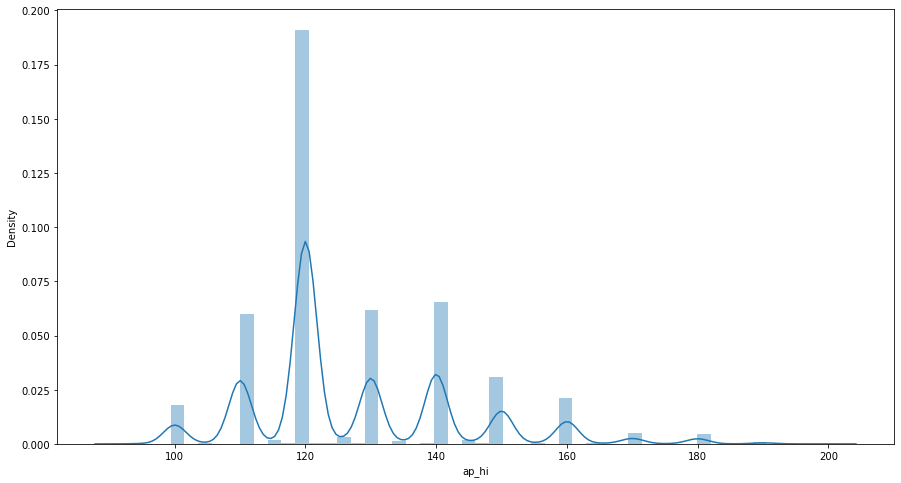

In [40]:
sns.distplot(df.ap_hi)
plt.show()

In [41]:
df.ap_hi.skew()

0.9607388174507228

<AxesSubplot:xlabel='ap_hi'>

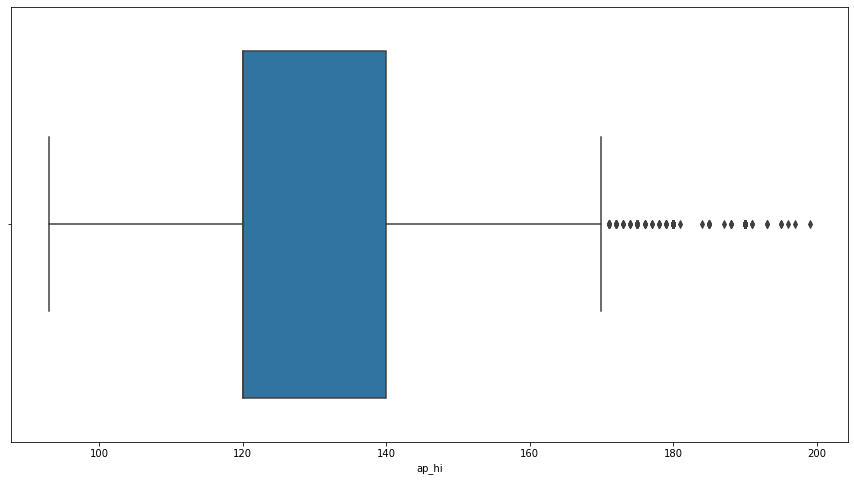

In [42]:
sns.boxplot(df.ap_hi)

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The systolic blood pressure variable is highly positively skewed and has alot of outliers. After the outlier treatment the skewness has drasticly reduced and became near normal. 
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
df.ap_lo.describe()

count    67940.000000
mean        96.613085
std        185.157344
min          0.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      10000.000000
Name: ap_lo, dtype: float64

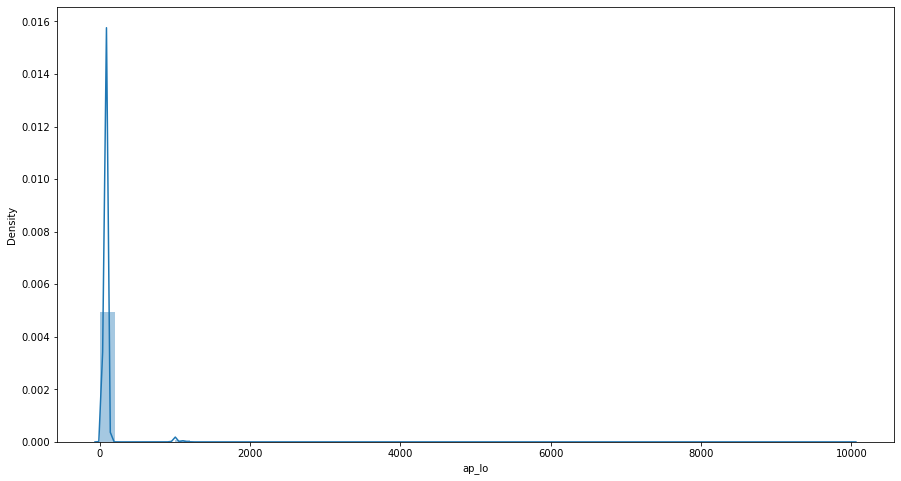

In [44]:
sns.distplot(df['ap_lo'])
plt.show()

In [45]:
df.ap_lo.skew()

31.796498463945074

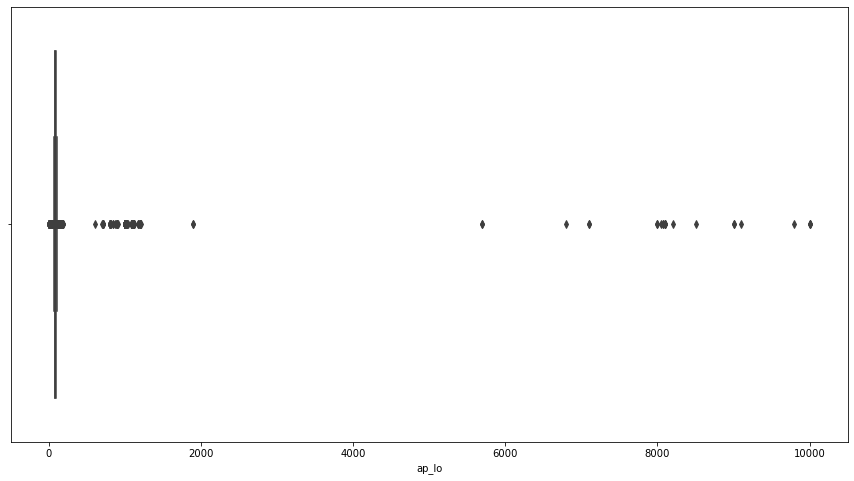

In [46]:
sns.boxplot(df.ap_lo)
plt.show()

In [47]:
Q1 = df.ap_lo.quantile(0.25) 
Q3 = df.ap_lo.quantile(0.75)
IQR = Q3 - Q1
UT = Q3 + 3*IQR
LT = Q1 - 1.5*IQR
df = df[(df.ap_lo<UT) & (df.ap_lo > LT)]
df.shape

(64750, 14)

In [48]:
df.ap_lo.describe()

count    64750.000000
mean        82.130981
std          8.059448
min         66.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        119.000000
Name: ap_lo, dtype: float64

<AxesSubplot:xlabel='ap_lo', ylabel='Density'>

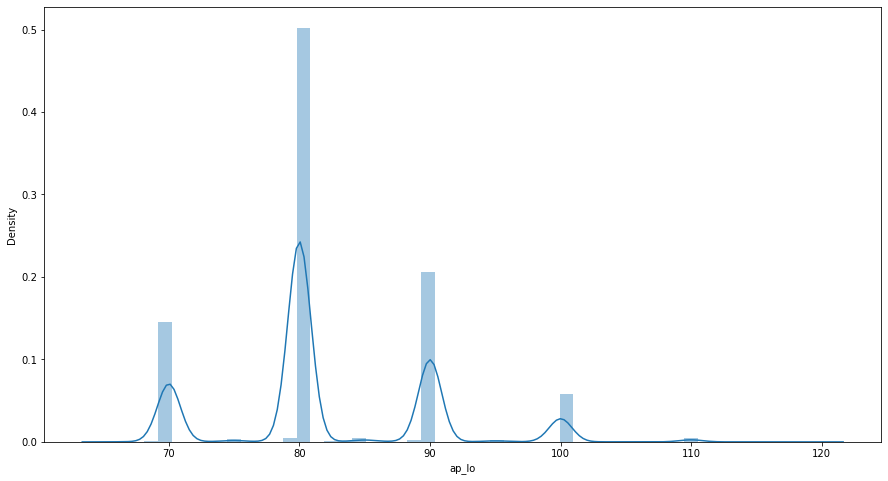

In [49]:
sns.distplot(df['ap_lo'])

In [50]:
df.ap_lo.skew()

0.6084126830526155

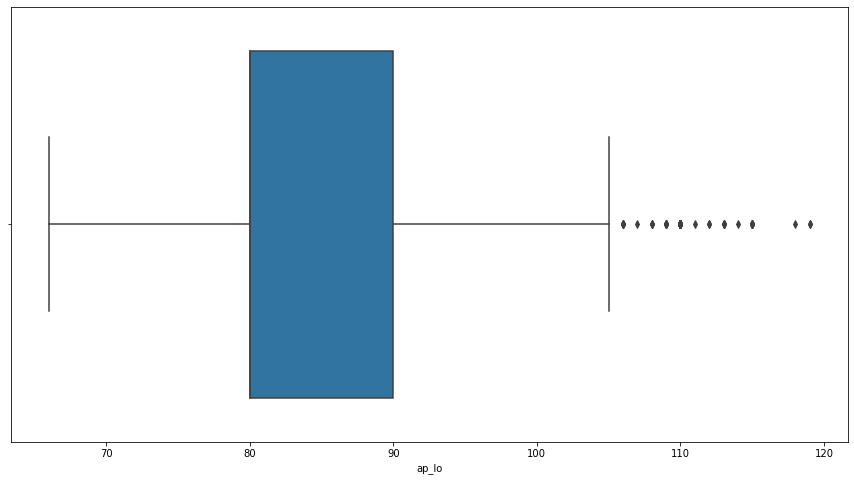

In [51]:
sns.boxplot(df.ap_lo)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The diastolic blood pressure variable is highly positively skewed and has alot of outliers. After the outlier treatment the skewness has drasticly reduced and became near normal. 
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
df.BMI.describe()

count    64750.000000
mean        27.526637
std          5.157935
min         13.520000
25%         23.880000
50%         26.450000
75%         30.300000
max         68.310000
Name: BMI, dtype: float64

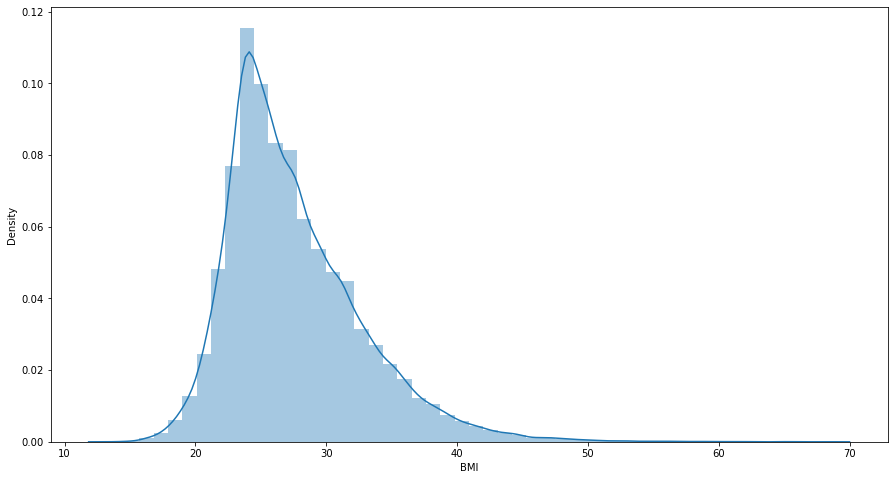

In [53]:
sns.distplot(df.BMI)
plt.show()

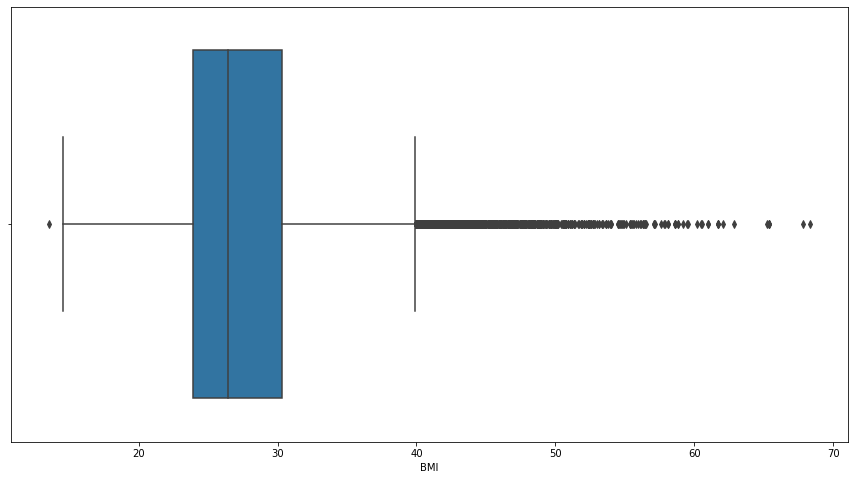

In [54]:
sns.boxplot(df.BMI)
plt.show()

In [55]:
df.BMI.skew()

1.1944741732747544

In [56]:
Q1 = df.BMI.quantile(0.25) 
Q3 = df.BMI.quantile(0.75)
IQR = Q3 - Q1
UT = Q3 + 1.5*IQR
LT = Q1 - 1.5*IQR
df = df[(df.BMI<UT) & (df.BMI> LT)]
df.shape

(63104, 14)

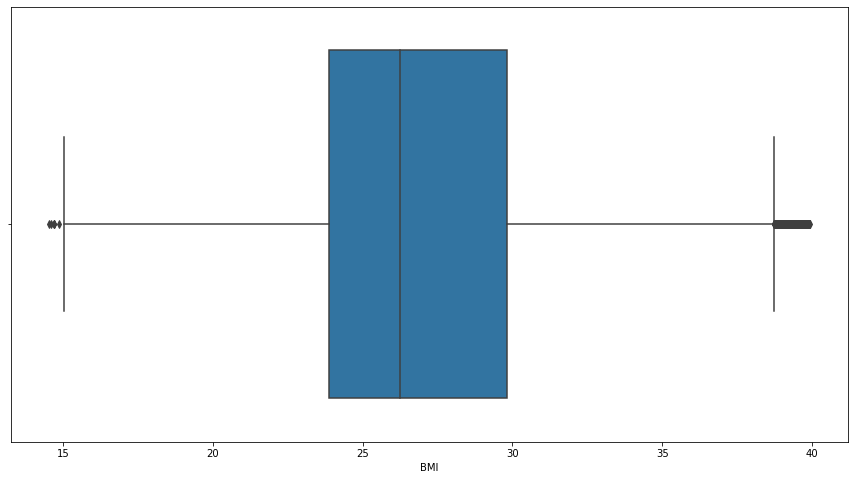

In [57]:
sns.boxplot(df.BMI)
plt.show()

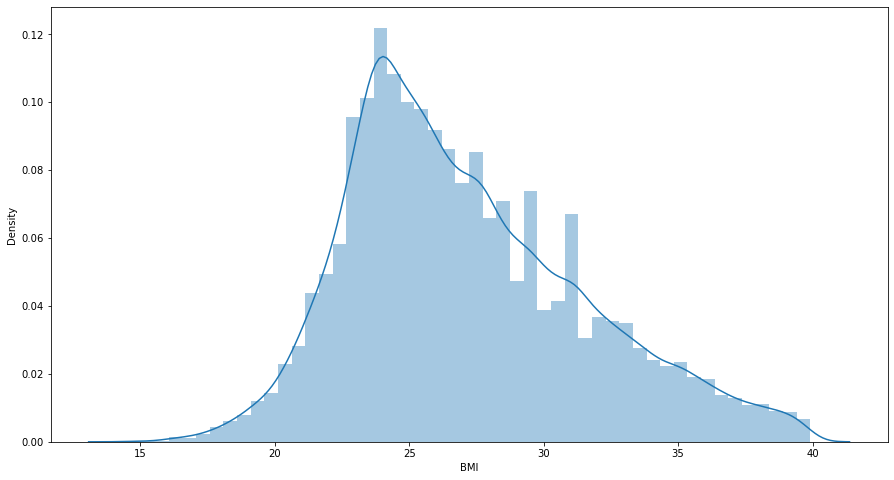

In [58]:
sns.distplot(df.BMI)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The BMI variable is positively skewed and has outliers. After the outlier treatment the skewness has drasticly reduced and became near normal. 
                </font>
            </div>
        </td>
    </tr>
</table>

gender
1    40485
0    22619
Name: gender, dtype: int64 1    0.64156
0    0.35844
Name: gender, dtype: float64


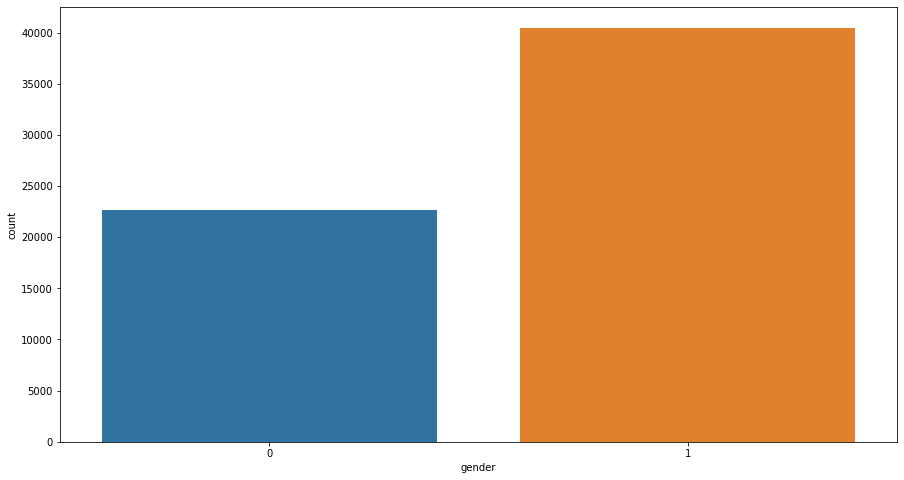

---------------------------------------------------------------------
cholesterol
1    47476
2     8412
3     7216
Name: cholesterol, dtype: int64 1    0.752345
2    0.133304
3    0.114351
Name: cholesterol, dtype: float64


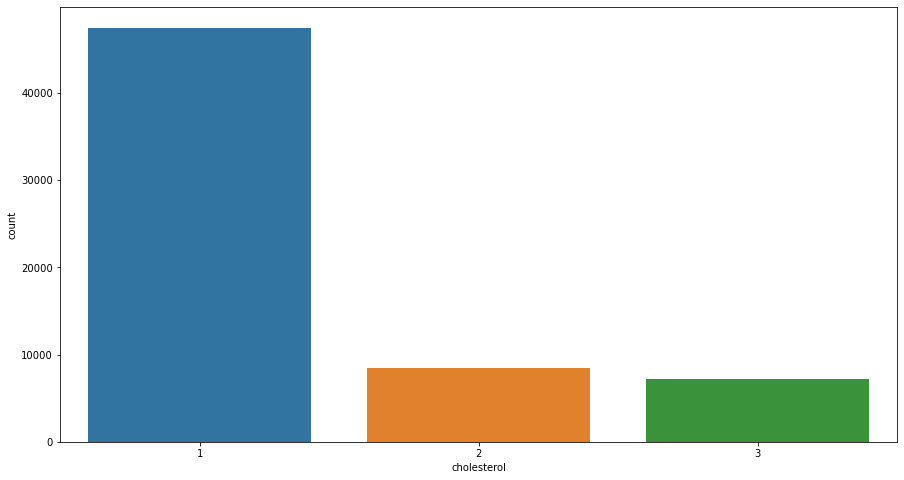

---------------------------------------------------------------------
gluc
1    53812
3     4773
2     4519
Name: gluc, dtype: int64 1    0.852751
3    0.075637
2    0.071612
Name: gluc, dtype: float64


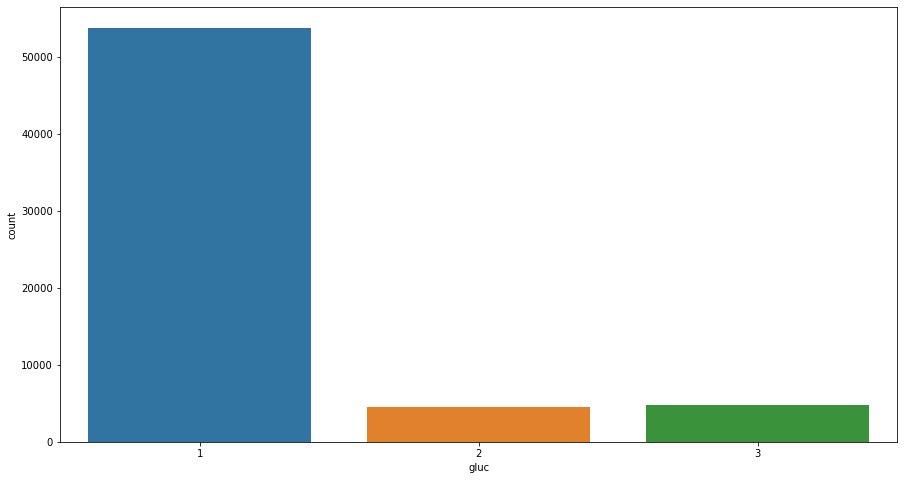

---------------------------------------------------------------------
smoke
0    57493
1     5611
Name: smoke, dtype: int64 0    0.911083
1    0.088917
Name: smoke, dtype: float64


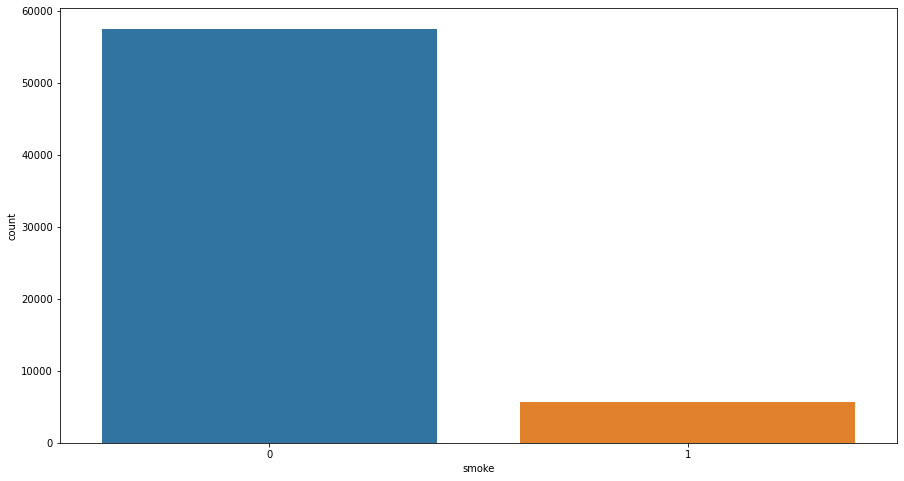

---------------------------------------------------------------------
alco
0    59733
1     3371
Name: alco, dtype: int64 0    0.94658
1    0.05342
Name: alco, dtype: float64


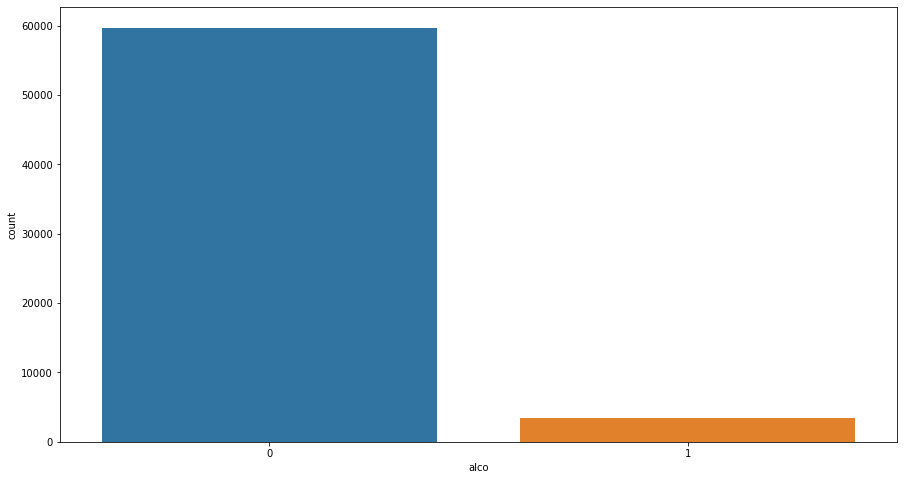

---------------------------------------------------------------------
active
1    50754
0    12350
Name: active, dtype: int64 1    0.804291
0    0.195709
Name: active, dtype: float64


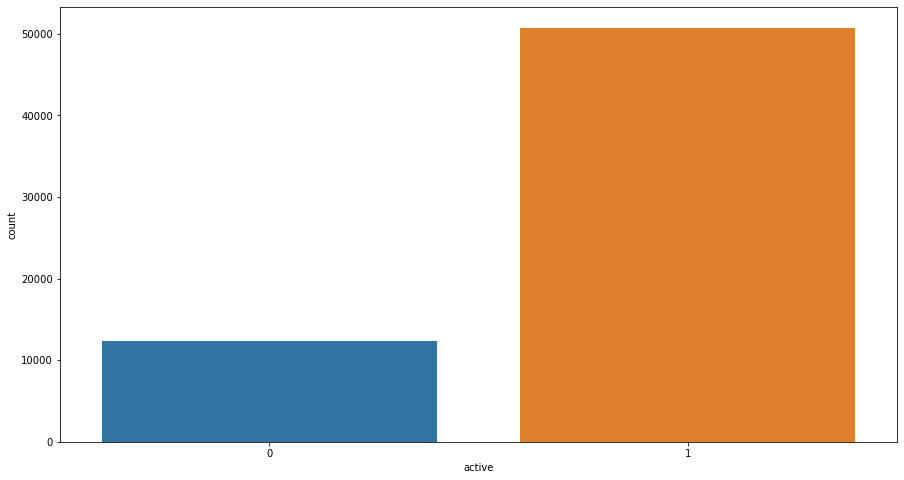

---------------------------------------------------------------------


In [59]:
cat=df[['gender','cholesterol','gluc','smoke','alco','active']]
for var in cat.columns:
    print(var)
    print(df[var].value_counts(),df[var].value_counts(normalize=True))
    sns.countplot(df[var])
    plt.show()
    print('---------------------------------------------------------------------')




# Insights
1. Gender column has 65% of male and 35% of female patient.

2. 74% of patients have normal cholesterol levels and only 11% have  high cholesterol levels.

3. 84% of patients have normal glucose levels and only 7% have high glucose levels

4. 91% of patients dont smoke and only 8% persons smoke.

5. 94% of patients are not alcoholic and only 5% are alcoholic.

6. 80% patients are doing physical activity and 19% are not.

<a id='mul'></a>
## 3.6 Bivariate Analysis

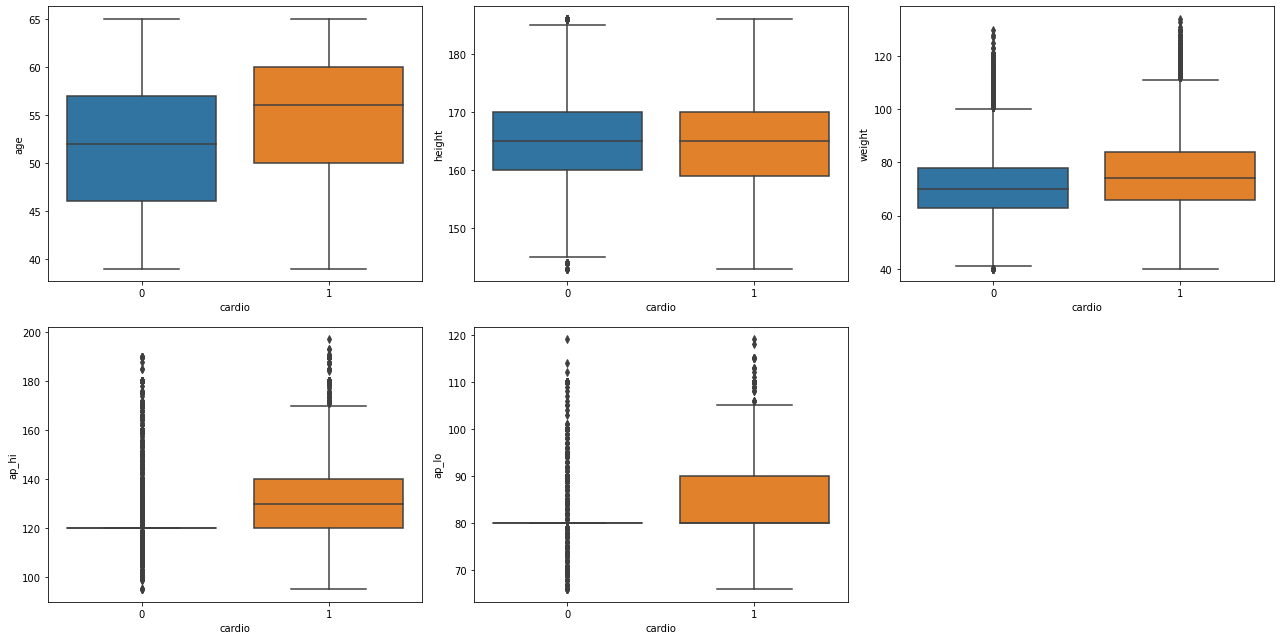

In [60]:
data=df[['age','height','weight','ap_hi','ap_lo']]
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(18, 9))
for variable, subplot in zip(data.columns, ax.flatten()):   
    sns.boxplot(df['cardio'],df[variable], ax = subplot)

plt.tight_layout()
fig.delaxes(ax[1][2])
plt.show()

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The boxplot of the continous variables explains their relation with the target variable 'Cardio'<b>
                 <br><br>   1.The patients with cardio disease are of average age of 57.
                 <br><br>   2.The height doesn't show any relation ship with cardio as both have the same height.
                 <br><br>    3.The weight of patients with the disease have higher weight.
                  <br><br>  4. patients with the disease have higher systollic blood pressure and Diastollic blood pressure
                </font>
            </div>
        </td>
    </tr>
</table>

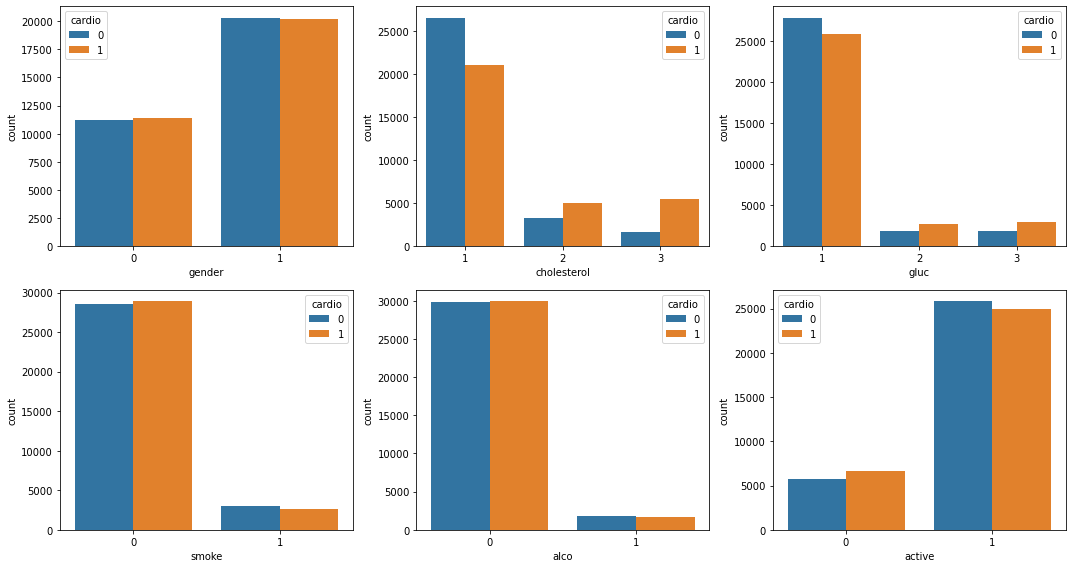

In [61]:
cat=df[['gender','cholesterol','gluc','smoke','alco','active']]
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))
for variable, subplot in zip(cat.columns, ax.flatten()):   
    sns.countplot(df[variable],hue=df['cardio'], ax = subplot)

plt.tight_layout()

plt.show()

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The barplot of the categorical variables explains their relation with the target variable 'Cardio'<b>
                 <br><br>   1.There is complete balance in gender of the people with and without the disease.
                 <br><br>   2.The patients with different levels of cholesterol are prone to the disease.
                 <br><br>    3.The count of the people with the disease and also who smoke are very less.
                  <br><br>  4. Very less people who are alcoholic are prone to the disease.
                    <br><br>5.Patients with cardio are less active comparatively.
                </font>
            </div>
        </td>
    </tr>
</table>

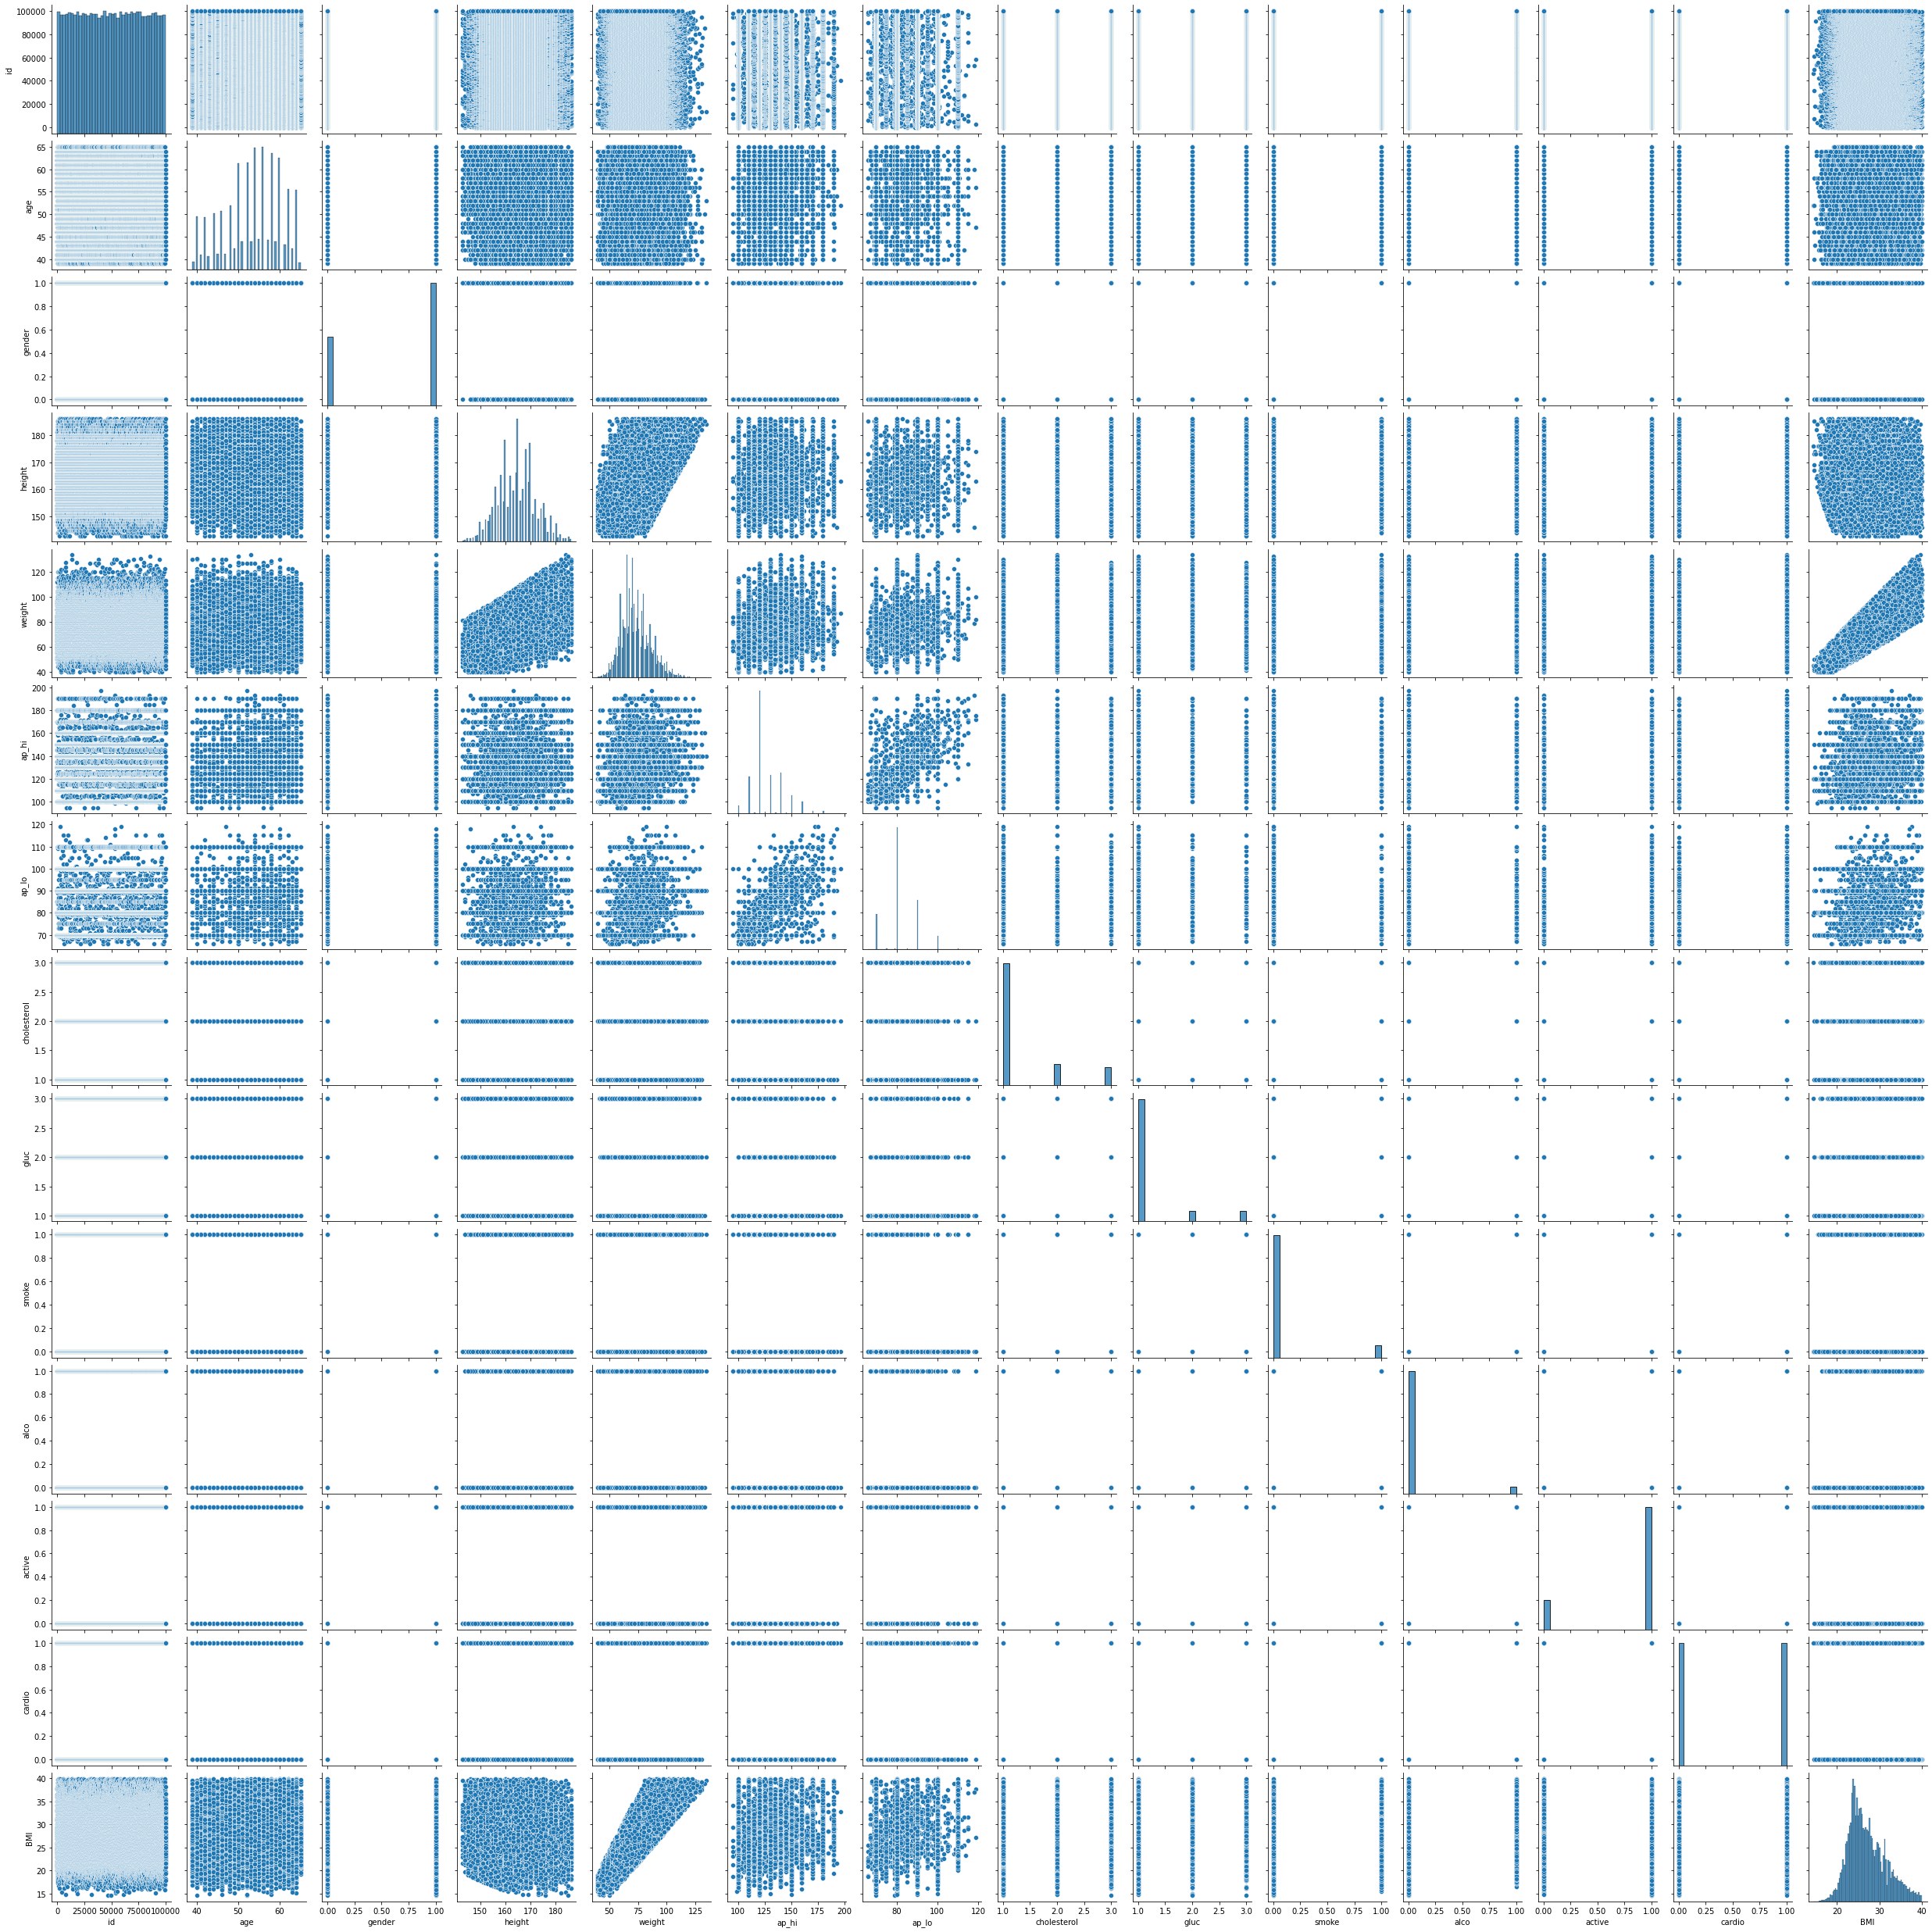

In [62]:
sns.pairplot(df)

<a id='stat'></a>
## 3.7  Summary Statistics

In [63]:
df.describe()

,id,age,height,weight,ap_hi,ap_lo,cardio,BMI
count,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000
mean,49947.738321,53.421368,164.632242,73.406736,127.201683,82.019286,0.500143,27.098366
std,28864.489104,6.736173,7.565849,12.632571,15.250411,8.002226,0.500004,4.429223
min,0.000000,39.000000,143.000000,40.000000,95.000000,66.000000,0.000000,14.530000
25%,24897.750000,49.000000,159.000000,65.000000,120.000000,80.000000,0.000000,23.880000
50%,49979.500000,54.000000,165.000000,72.000000,120.000000,80.000000,1.000000,26.260000
75%,74858.250000,58.000000,170.000000,81.000000,140.000000,90.000000,1.000000,29.820000
max,99999.000000,65.000000,186.000000,134.000000,197.000000,119.000000,1.000000,39.920000


In [64]:
df.shape

(63104, 14)

In [193]:
df['cardio'].value_counts()

1    31561
0    31543
Name: cardio, dtype: int64

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The above output illustrates the summary statistics of the numerical variables.<br>
                        The id column has all unique values so we can ignore it for analysis.The average age of the patients is 53 and the average BMI is 14kg/m2
                    <br><br> The final shape of the data is 63104 rows and 12 columns after we remove id column
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='missing_values'></a>
## 3.8 Missing Values

Let us plot the heatmap to visualize the missing values in the data.

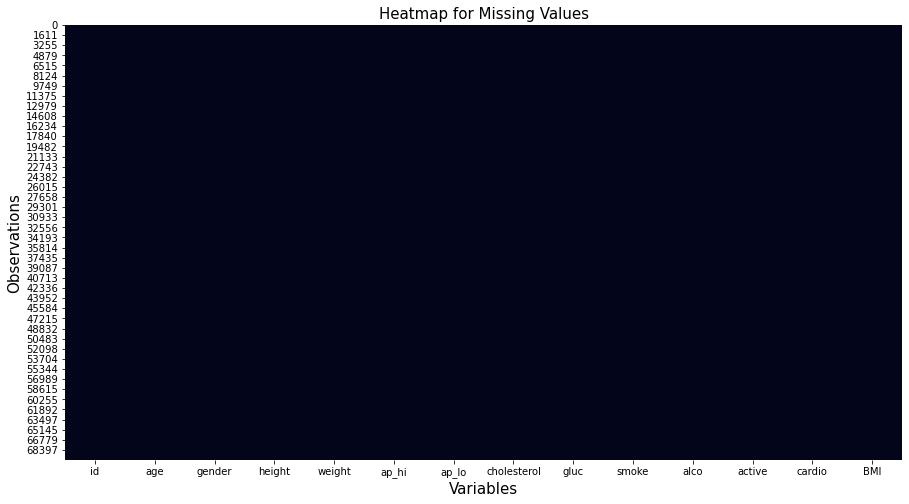

In [65]:
 sns.heatmap(df.isnull(), cbar=False)

plt.title('Heatmap for Missing Values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Observations', fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The above plot shows that there are no missing values in the data. <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='preparation_of_data'></a>
## 3.9 Prepare the Data 

In [66]:
df=df.drop('id',axis=1)

In [67]:
features = df.copy()
features.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,0,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48,0,169,82.0,150,100,1,1,0,0,1,1,28.71
5,60,1,151,67.0,120,80,2,2,0,0,0,0,29.38


In [68]:
features_df=pd.get_dummies(features,drop_first=True)
features_df

,age,height,weight,ap_hi,ap_lo,cardio,BMI,gender_1,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1
0,50,168,62.0,110,80,0,21.97,0,0,0,0,0,0,0,1
1,55,156,85.0,140,90,1,34.93,1,0,1,0,0,0,0,1
2,52,165,64.0,130,70,1,23.51,1,0,1,0,0,0,0,0
3,48,169,82.0,150,100,1,28.71,0,0,0,0,0,0,0,1
5,60,151,67.0,120,80,0,29.38,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,58,165,80.0,150,80,1,29.38,1,0,0,0,0,0,0,1
69995,53,168,76.0,120,80,0,26.93,0,0,0,0,0,1,0,1
69997,52,183,105.0,180,90,1,31.35,0,0,1,0,0,0,1,0
69998,61,163,72.0,135,80,1,27.10,1,0,0,1,0,0,0,0


In [192]:
features_df.describe()

,age,height,weight,ap_hi,ap_lo,cardio,BMI,gender_1,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1
count,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000,63104.000000
mean,53.421368,164.632242,73.406736,127.201683,82.019286,0.500143,27.098366,0.641560,0.133304,0.114351,0.071612,0.075637,0.088917,0.053420,0.804291
std,6.736173,7.565849,12.632571,15.250411,8.002226,0.500004,4.429223,0.479546,0.339905,0.318240,0.257846,0.264419,0.284626,0.224871,0.396748
min,39.000000,143.000000,40.000000,95.000000,66.000000,0.000000,14.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,159.000000,65.000000,120.000000,80.000000,0.000000,23.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,1.000000,26.260000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,58.000000,170.000000,81.000000,140.000000,90.000000,1.000000,29.820000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,65.000000,186.000000,134.000000,197.000000,119.000000,1.000000,39.920000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
features=df.drop('cardio',axis=1)
df_num=features.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_new = scaler.fit_transform(df_num)     
features_scaled = pd.DataFrame(df_new, columns = df_num.columns)
features_scaled.head()

,age,height,weight,ap_hi,ap_lo,BMI
0,-0.507914,0.445130,-0.902970,-1.127958,-0.252342,-1.157857
1,0.234353,-1.140957,0.917735,0.839218,0.997320,1.768187
2,-0.211007,0.048608,-0.744647,0.183493,-1.502005,-0.810163
3,-0.804821,0.577304,0.680252,1.494943,2.246982,0.363867
4,0.976620,-1.801827,-0.507164,-0.472233,-0.252342,0.515136


In [70]:
categoric = features.select_dtypes(include='object')
categoric.columns

Index(['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'], dtype='object')

In [71]:
categorical=pd.get_dummies(categoric,drop_first=True)

In [72]:
features_scaled.index=categorical.index

In [73]:
df_final=pd.concat([features_scaled,categorical],axis=1)
df_final.head(10)

,age,height,weight,ap_hi,ap_lo,BMI,gender_1,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1
0,-0.507914,0.445130,-0.902970,-1.127958,-0.252342,-1.157857,0,0,0,0,0,0,0,1
1,0.234353,-1.140957,0.917735,0.839218,0.997320,1.768187,1,0,1,0,0,0,0,1
2,-0.211007,0.048608,-0.744647,0.183493,-1.502005,-0.810163,1,0,1,0,0,0,0,0
3,-0.804821,0.577304,0.680252,1.494943,2.246982,0.363867,0,0,0,0,0,0,0,1
5,0.976620,-1.801827,-0.507164,-0.472233,-0.252342,0.515136,1,1,0,1,0,0,0,0
6,1.125074,-1.008783,1.551024,0.183493,-0.252342,2.400357,1,0,1,0,0,0,0,1
7,1.273527,1.766869,1.709346,0.183493,0.997320,0.650601,0,0,1,0,1,0,0,1
8,-0.804821,-0.876609,-0.190520,-1.127958,-1.502005,0.302907,1,0,0,0,0,0,0,1
10,1.273527,0.577304,0.521930,-0.472233,-0.252342,0.205824,1,0,0,0,0,0,0,1
11,-0.211007,1.105999,-1.061292,-0.472233,-0.252342,-1.591345,0,0,0,0,0,0,0,1


In [74]:
xtrain,xtest,ytrain,ytest = train_test_split(df_final,df['cardio'],random_state=100,test_size=0.2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(50483, 14)
(12621, 14)
(50483,)
(12621,)


<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Thus, we have scaled all the numeric features in the data and dummy encoded categorical and stored it in a dataframe 'features_scaled'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



In [75]:
def plot_roc(model, test_data):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))
    plt.grid(True)

In [76]:
def plot_confusion_matrix(model, test_data,cutoff):
    y_pred_prob = model.predict_proba(xtest)[:,1]
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    cm = confusion_matrix(ytest, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [77]:
score_card_test = pd.DataFrame(columns=['Model','Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])
def update_score_card_test(model, cutoff):
    y_pred_prob = model.predict_proba(xtest)[:,1]
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    global score_card_test
    score_card_test = score_card_test.append({'Model': model,'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(ytest, y_pred),
                                    'Precision Score': metrics.precision_score(ytest, y_pred),
                                    'Recall Score': metrics.recall_score(ytest, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, y_pred),
                                    'f1-score': metrics.f1_score(ytest, y_pred)}, 
                                    ignore_index = True)
    return score_card_test

In [78]:
score_card_train = pd.DataFrame(columns=["Model",'Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])
def update_score_card_train(model, cutoff):
    y_pred_prob = model.predict_proba(xtrain)[:,1]
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    global score_card_train
    score_card_train = score_card_train.append({'Model': model,'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(ytrain, y_pred),
                                    'Precision Score': metrics.precision_score(ytrain, y_pred),
                                    'Recall Score': metrics.recall_score(ytrain, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(ytrain, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytrain, y_pred),
                                    'f1-score': metrics.f1_score(ytrain, y_pred)}, 
                                    ignore_index = True)
    return score_card_train

<a id='Logit'></a>
# 4. Classification Models

<a id='base'></a>
## 4.1 Build the Base Model-Logistic regression

In [79]:
X = sm.add_constant(df_final)
xtrain,xtest,ytrain,ytest = train_test_split(X,df['cardio'],random_state=100,test_size=0.2)
logreg = sm.Logit(ytrain,xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.562619
         Iterations 6


In [80]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                50483
Model:                          Logit   Df Residuals:                    50468
Method:                           MLE   Df Model:                           14
Date:                Thu, 14 Oct 2021   Pseudo R-squ.:                  0.1883
Time:                        13:36:35   Log-Likelihood:                -28403.
converged:                       True   LL-Null:                       -34992.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1340      0.030      4.529      0.000       0.076       0.192
age               0.3453      0.011     32.460      0.000       0.324       0.366
height           -0.0406      0.065     -0.621      0.535      -0.169       0.087
weight            0.1302      0.120      1.081      0.280      -0.106       0.366
ap_hi             0.9053      0.017     52.104      0.000       0.871       0.939
ap_lo             0.1250      0.015      8.084      0.000       0.095       0.155
BMI               0.0219      0.114      0.193      0.847      -0.201       0.245
gender_1          0.0099      0.026      0.383      0.702      -0.041       0.061
cholesterol_2     0.3488      0.032     10.859      0.000       0.286       0.412
cholesterol_3     1.0827      0.042     25.842      0.000       1.001       1.165
gluc_2            0.0079      0.043      0.184      0.854      -0.076       0.092
gluc_3           -0.3636      0.046     -7.833      0.000      -0.455      -0.273
smoke_1          -0.1166      0.041     -2.876      0.004      -0.196      -0.037
alco_1           -0.2110      0.049     -4.268      0.000      -0.308      -0.114
active_1         -0.2364      0.026     -9.265      0.000      -0.286      -0.186
=================================================================================
"""

<table align="left">
   <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>* constant: the odds of patient having CVD is 1/e**0.1340, considering all the variables.

<br>* age  : 0.3453 , it implies that the odds of a individual having cardiovascular disease increases by a factor of e**0.3453 due to unit increase in the age
<br>* height : -0.0406 , it implies that the odds of a individual having cardiovascular disease increases by a factor of e**-0.0416 due to unit increase in the height and is insignificant
<br>* weight: 0.1302 , it implies that the odds of a individual having cardiovascular disease increases by a factor of e**0.1302 due to unit increase in the weight and is insignificant
<br>* ap_hi :  0.9053 , it implies that the odds of a individual having cardiovascular disease increases by a factor of e**0.9053 due to unit increase in the ap_hi
<br>* ap_lo : 0.1250 , it implies that the odds of a individual having cardiovascular disease increases by a factor of e**0.1250 due to unit increase in the ap_lo 
<br>* BMI :  0.0219 , it implies that the odds of a individual having cardiovascular disease increases by a factor of e**0.0219 due to unit increase in the BMI and is insignificant
<br>* gender_1 : 0.0099, it implies that the odds of a individual having cardiovascular disease increases by a factor of e**0.0099 due to unit increase in the gender_1 and is insignificant
<br>* cholesterol_2:0.3458 , it implies that the odds of a individual having cardiovascular disease increases by a factor of e**0.3458 due to unit increase in the cholesterol_2
<br>* cholesterol_3:1.0827 , it implies that the odds of a individual having cardiovascular disease increases by a factor of e**1.0827 due to unit increase in the cholesterol_3
<br>* gluc_2 : 0.0079 , it implies that the odds of a individual having cardiovascular disease increases by a factor of e**0.0079 due to unit increase in the gluc_2
<br>* gluc_3 : -0.3636 , it implies that the odds of a individual having cardiovascular disease increases by a factor of e**-0.3636 due to unit increase in the gluc_3
<br>* smoke_1 : -0.1166, it implies that the odds of a individual having cardiovascular disease increases by a factor of e**-0.1166 due to unit increase in the smoke_1.
<br>* alco_1 : -0.2110 , it implies that the odds of a individual having cardiovascular disease increases by a factor of e**-0.2110 due to unit increase in the alco_1
<br>* active_1 : -0.2364, it implies that the odds of a individual having cardiovascular disease increases by a factor of e**-0.2364 due to unit increase in the active_1. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [168]:
xtrain,xtest,ytrain,ytest = train_test_split(df_final,df['cardio'],random_state=100,test_size=0.2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)
sc=StandardScaler()
LR=LogisticRegression(random_state=0)
LR.fit(xtrain,ytrain)

(50483, 14)
(12621, 14)
(50483,)
(12621,)


LogisticRegression(random_state=0)

In [169]:

update_score_card_train(LR,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646295,0.596504,0.906600,0.646455,0.292684,0.719565
1,DecisionTreeClassifier(),0.3,0.969142,0.945857,0.995328,0.969158,0.938314,0.969962
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.684826,0.634106,0.875401,0.684943,0.369739,0.735468
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.934238,0.888012,0.993982,0.934275,0.868540,0.938014
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.682913,0.629223,0.892228,0.683042,0.365921,0.737993
5,KNeighborsClassifier(n_neighbors=3),0.3,0.721995,0.643461,0.997228,0.722164,0.444140,0.782205
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.681657,0.625852,0.905016,0.681794,0.363413,0.739981
7,GaussianNB(),0.3,0.704830,0.718156,0.674823,0.704812,0.409645,0.695815
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.3,0.500000,0.500307,1.000000,0.500307,0.000000,0.666940
9,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,0.808743,0.743130,0.944293,0.808827,0.617590,0.831720


In [170]:
update_score_card_test(LR,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646970,0.595904,0.909264,0.646700,0.293781,0.719965
1,DecisionTreeClassifier(),0.3,0.621848,0.615304,0.648001,0.621821,0.243682,0.631229
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.674084,0.623700,0.875000,0.673877,0.348023,0.728281
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.659576,0.614689,0.852316,0.659377,0.319025,0.714257
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.668477,0.616665,0.887532,0.668251,0.336802,0.727710
5,KNeighborsClassifier(n_neighbors=3),0.3,0.608162,0.568999,0.886263,0.607876,0.216200,0.693047
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.654466,0.605047,0.886263,0.654227,0.308784,0.719140
7,GaussianNB(),0.3,0.710932,0.721703,0.685755,0.710958,0.421886,0.703270
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.3,0.500000,0.499485,1.000000,0.499485,0.000000,0.666209
9,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,0.673662,0.628005,0.849461,0.673481,0.347198,0.722136


None


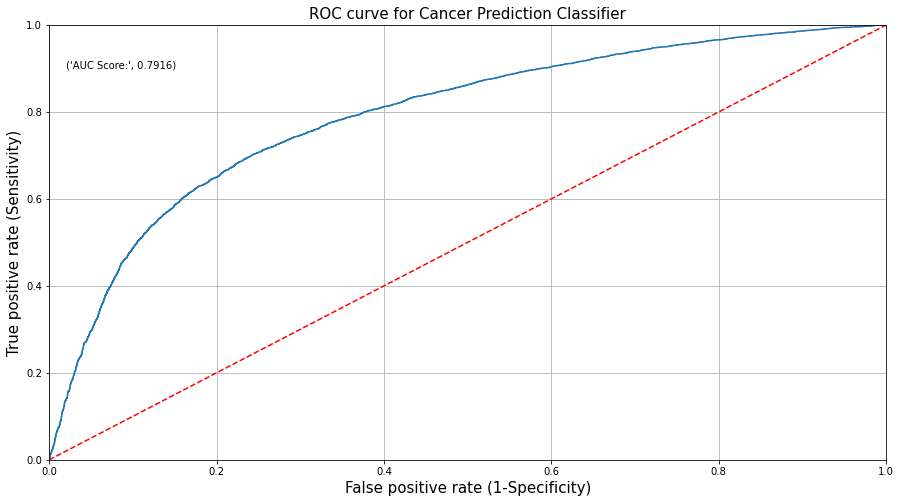

In [165]:
print(plot_roc(LR,xtest))

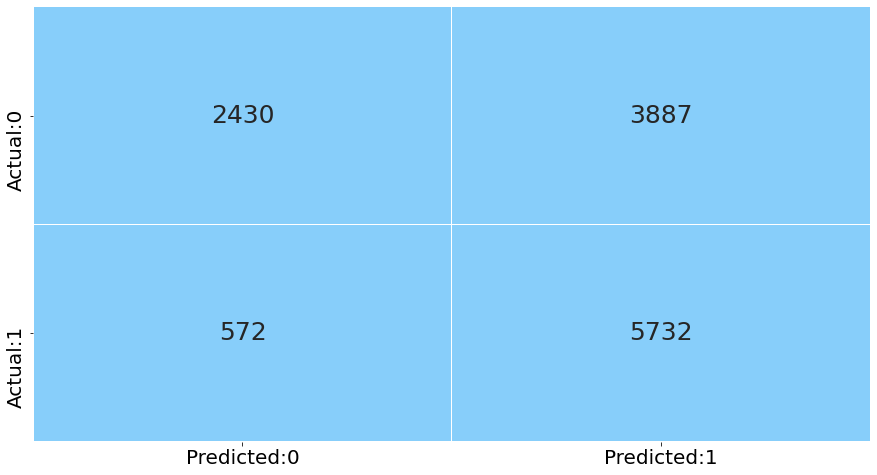

None


In [166]:
print(plot_confusion_matrix(LR,xtest,cutoff=0.3))

In [174]:
w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14=LR.coef_[0]
w=[w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14]
w

[0.34523902760557923,
 -0.039464815205713995,
 0.12818290024230825,
 0.9050813059981088,
 0.1251597515729077,
 0.023877535251459955,
 0.009915250277569157,
 0.34830419148389535,
 1.0803995892267648,
 0.008121308051827581,
 -0.3618357475178552,
 -0.11639754001717126,
 -0.21060728582201274,
 -0.23625435055812302]

In [175]:
featurenames=df_final.columns

In [179]:
import math
feature_importance=pd.DataFrame(featurenames,columns=['feature_names'])
feature_importance['importance']=pow(math.e,np.array(w))

In [183]:
important_features=feature_importance.sort_values(by='importance',ascending=False)
important_features

,feature_names,importance
8,cholesterol_3,2.945856
3,ap_hi,2.472133
7,cholesterol_2,1.416663
0,age,1.412327
2,weight,1.136761
4,ap_lo,1.133329
5,BMI,1.024165
6,gender_1,1.009965
9,gluc_2,1.008154
1,height,0.961304


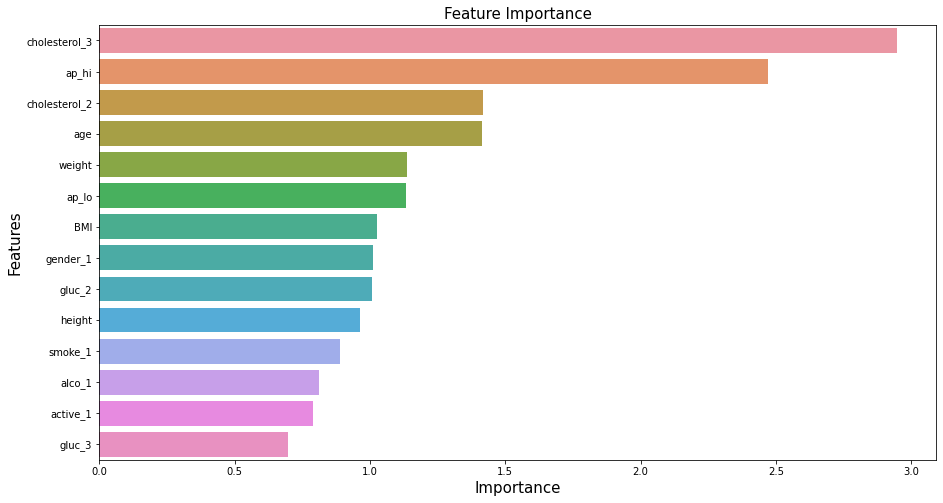

In [187]:
sns.barplot(x = 'importance', y = 'feature_names', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

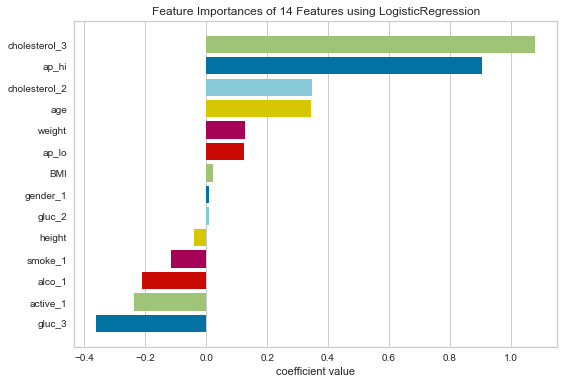

<AxesSubplot:title={'center':'Feature Importances of 14 Features using LogisticRegression'}, xlabel='coefficient value'>

In [191]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="auto", solver="liblinear")
viz = FeatureImportances(model, stack=False, relative=False)
viz.fit(xtrain, ytrain)
viz.show()

<a id='Tree'></a>
## 4.2 Decision Tree

In [86]:
DT = DecisionTreeClassifier()
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [87]:
update_score_card_train(DT,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646295,0.596504,0.906600,0.646455,0.292684,0.719565
1,DecisionTreeClassifier(),0.3,0.969142,0.945857,0.995328,0.969158,0.938314,0.969962


In [88]:
update_score_card_test(DT,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646970,0.595904,0.909264,0.646700,0.293781,0.719965
1,DecisionTreeClassifier(),0.3,0.621848,0.615304,0.648001,0.621821,0.243682,0.631229


None


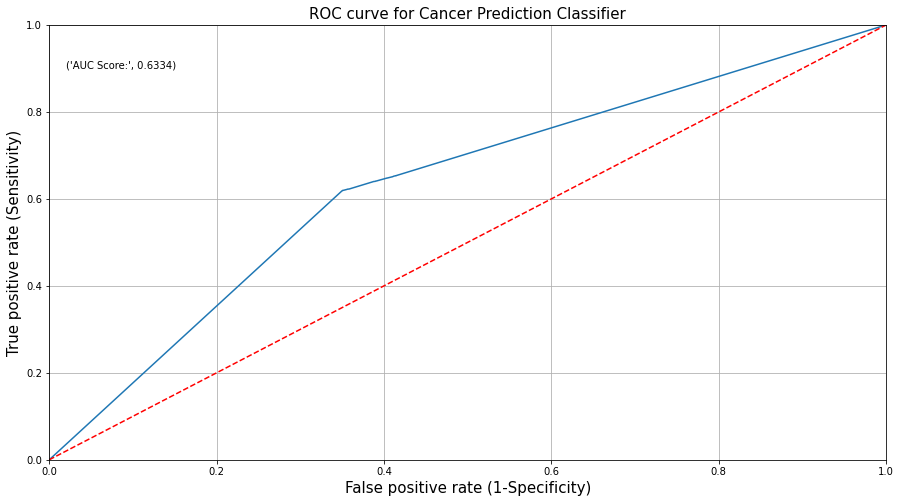

In [89]:
print(plot_roc(DT,xtest))

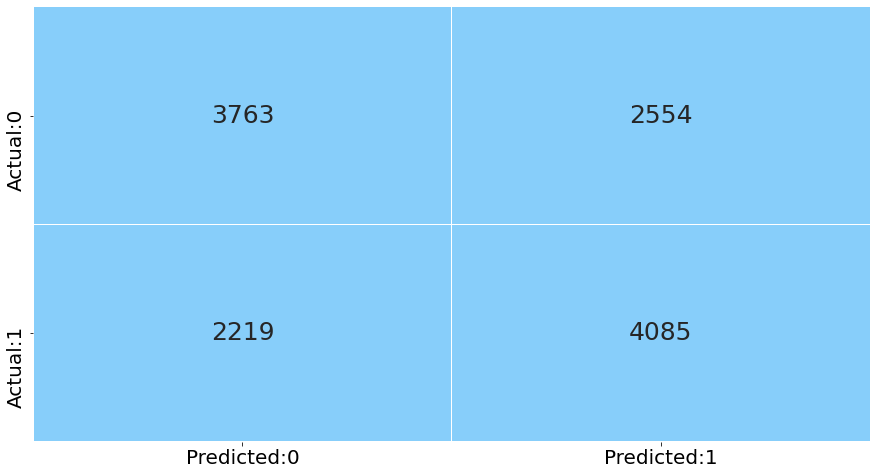

None


In [90]:
print(plot_confusion_matrix(DT,xtest,cutoff=0.3))

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>* We can observe that the accuracy score of the full model is 0.63 and recall is 0.62 which is not good model for this data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>





***tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': [3,5,7,9], 'min_samples_split':[25,50,100,150],
                   'min_samples_leaf': [75,150,300,450]}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
DT_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)
DT_grid_model = DT_grid.fit(xtrain, ytrain)
print('Best parameters for decision tree classifier: ', DT_grid_model.best_params_, '\n')***

In [92]:
DT_tuned = DecisionTreeClassifier(criterion= 'gini',
                                  max_depth= 9, 
                                  min_samples_leaf= 150, min_samples_split= 25)
DT_tuned.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=150, min_samples_split=25)

In [93]:
update_score_card_train(DT_tuned,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646295,0.596504,0.906600,0.646455,0.292684,0.719565
1,DecisionTreeClassifier(),0.3,0.969142,0.945857,0.995328,0.969158,0.938314,0.969962
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.684826,0.634106,0.875401,0.684943,0.369739,0.735468


In [94]:
update_score_card_test(DT_tuned,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646970,0.595904,0.909264,0.646700,0.293781,0.719965
1,DecisionTreeClassifier(),0.3,0.621848,0.615304,0.648001,0.621821,0.243682,0.631229
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.674084,0.623700,0.875000,0.673877,0.348023,0.728281


None


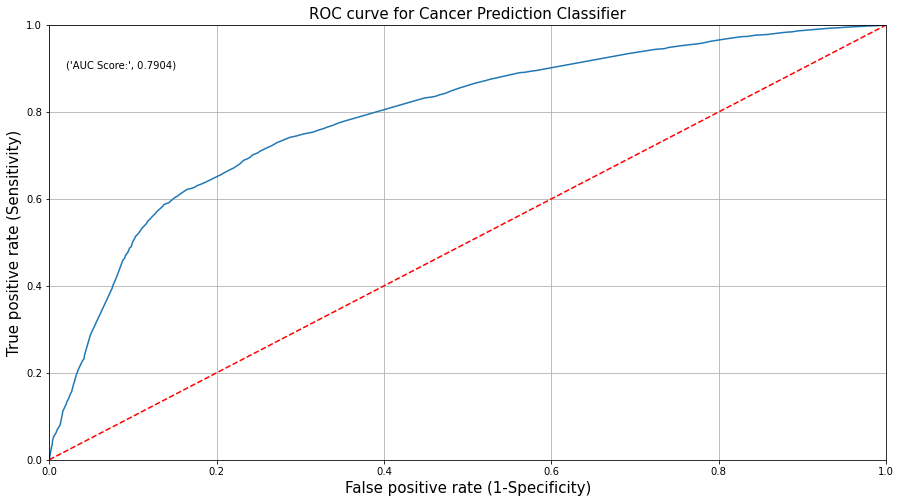

In [95]:
print(plot_roc(DT_tuned,xtest))

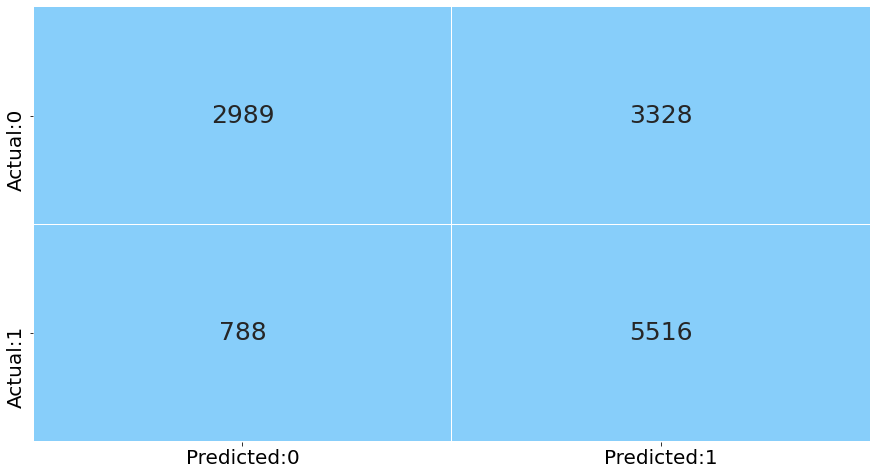

None


In [96]:
print(plot_confusion_matrix(DT_tuned,xtest,cutoff=0.3))

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>After parameter tuning and using the best parameters for the data the recall score has improved from 0.62 to 0.73.  </b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='forest'></a>
## 4.3 Random Forest

In [97]:
RF = RandomForestClassifier()
RF.fit(xtrain,ytrain)

RandomForestClassifier()

In [98]:
update_score_card_train(RF,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646295,0.596504,0.906600,0.646455,0.292684,0.719565
1,DecisionTreeClassifier(),0.3,0.969142,0.945857,0.995328,0.969158,0.938314,0.969962
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.684826,0.634106,0.875401,0.684943,0.369739,0.735468
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.934238,0.888012,0.993982,0.934275,0.868540,0.938014


In [99]:
update_score_card_test(RF,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646970,0.595904,0.909264,0.646700,0.293781,0.719965
1,DecisionTreeClassifier(),0.3,0.621848,0.615304,0.648001,0.621821,0.243682,0.631229
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.674084,0.623700,0.875000,0.673877,0.348023,0.728281
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.659576,0.614689,0.852316,0.659377,0.319025,0.714257


None


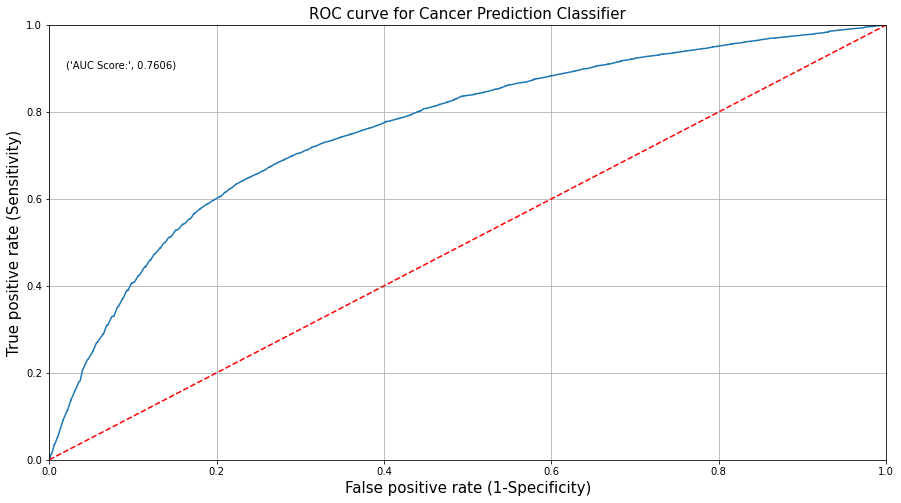

In [100]:
print(plot_roc(RF,xtest))

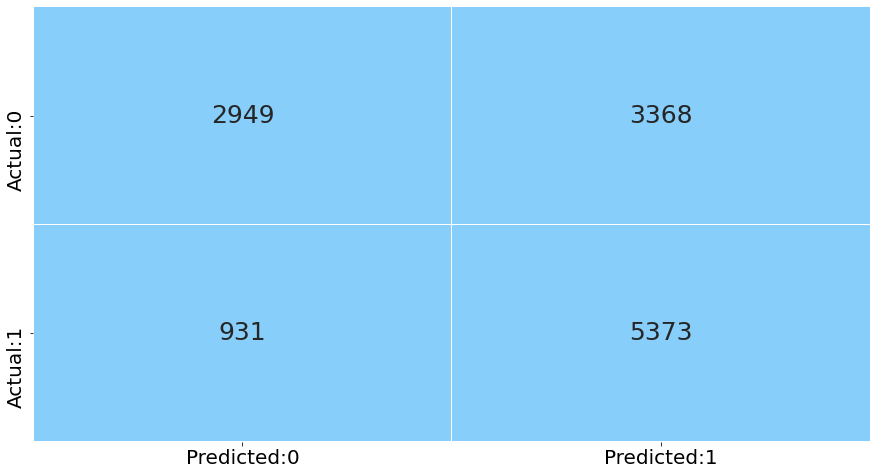

None


In [101]:
print(plot_confusion_matrix(RF,xtest,cutoff=0.3))

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Random forest has given 0.70 as recall and accuracy for the test data. </b>
                </font>
            </div>
        </td>
    </tr>
</table>


***tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                    'max_depth': [10, 15, 20],
                   'max_features': ['sqrt', 'log2'],
                  'min_samples_split': [2, 5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

RF_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, cv = 5)***


RF_grid_model = RF_grid.fit(xtrain, ytrain)
print('Best parameters for Random forest classifier: ', RF_grid_model.best_params_, '\n')

#Best parameters for Random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 11, 'n_estimators': 90} 

In [102]:
RF_grid_model = RandomForestClassifier(criterion= 'gini',max_depth =10, max_features= 'sqrt',min_samples_split=11,  n_estimators=90)
RF_grid_model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=11,
                       n_estimators=90)

In [103]:
update_score_card_train(RF_grid_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646295,0.596504,0.906600,0.646455,0.292684,0.719565
1,DecisionTreeClassifier(),0.3,0.969142,0.945857,0.995328,0.969158,0.938314,0.969962
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.684826,0.634106,0.875401,0.684943,0.369739,0.735468
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.934238,0.888012,0.993982,0.934275,0.868540,0.938014
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.682913,0.629223,0.892228,0.683042,0.365921,0.737993


In [104]:
update_score_card_test(RF_grid_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646970,0.595904,0.909264,0.646700,0.293781,0.719965
1,DecisionTreeClassifier(),0.3,0.621848,0.615304,0.648001,0.621821,0.243682,0.631229
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.674084,0.623700,0.875000,0.673877,0.348023,0.728281
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.659576,0.614689,0.852316,0.659377,0.319025,0.714257
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.668477,0.616665,0.887532,0.668251,0.336802,0.727710


None


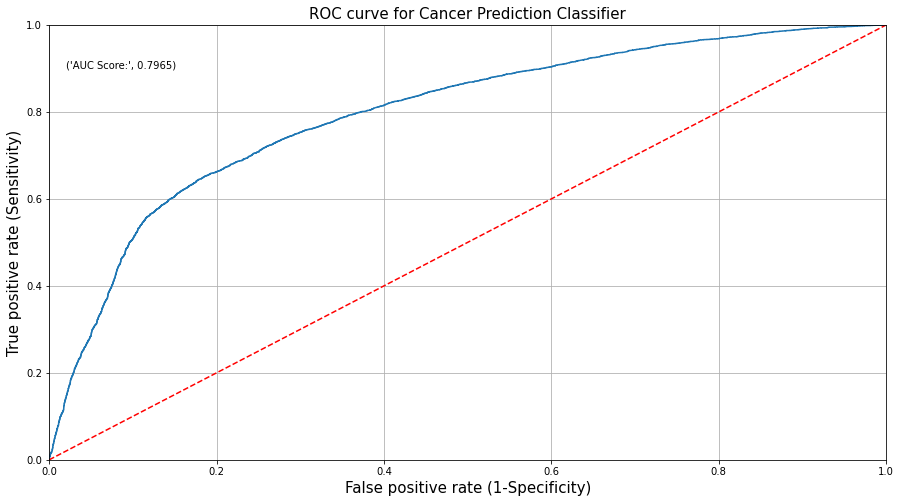

In [105]:
print(plot_roc(RF_grid_model,xtest))

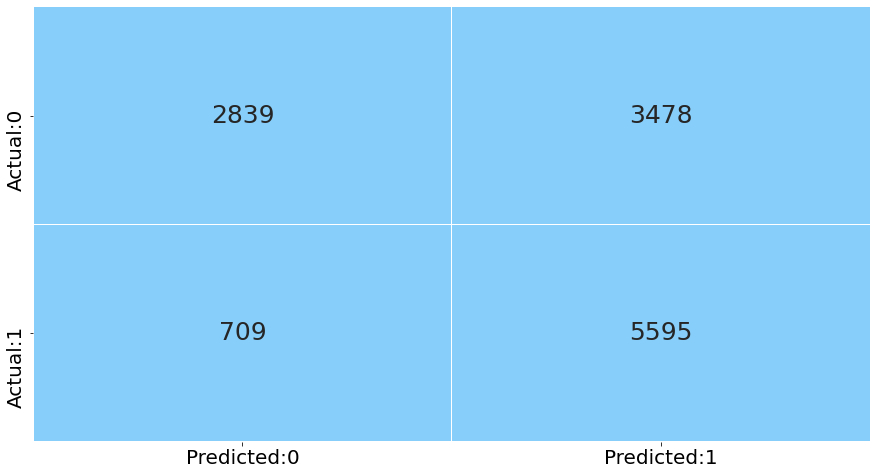

None


In [107]:
print(plot_confusion_matrix(RF_grid_model,xtest,cutoff=0.3))

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>After parameter tuning and using the best parameters for the data the recall score has improved from 0.70 to 0.72.  </b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='knn'></a>
## 4.4 K-Nearest Neighbours

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(xtrain, ytrain)

In [109]:
update_score_card_train(knn_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646295,0.596504,0.906600,0.646455,0.292684,0.719565
1,DecisionTreeClassifier(),0.3,0.969142,0.945857,0.995328,0.969158,0.938314,0.969962
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.684826,0.634106,0.875401,0.684943,0.369739,0.735468
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.934238,0.888012,0.993982,0.934275,0.868540,0.938014
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.682913,0.629223,0.892228,0.683042,0.365921,0.737993
5,KNeighborsClassifier(n_neighbors=3),0.3,0.721995,0.643461,0.997228,0.722164,0.444140,0.782205


In [110]:
update_score_card_test(knn_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646970,0.595904,0.909264,0.646700,0.293781,0.719965
1,DecisionTreeClassifier(),0.3,0.621848,0.615304,0.648001,0.621821,0.243682,0.631229
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.674084,0.623700,0.875000,0.673877,0.348023,0.728281
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.659576,0.614689,0.852316,0.659377,0.319025,0.714257
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.668477,0.616665,0.887532,0.668251,0.336802,0.727710
5,KNeighborsClassifier(n_neighbors=3),0.3,0.608162,0.568999,0.886263,0.607876,0.216200,0.693047


***tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification,param_grid = tuned_paramaters, 
                      cv = 5, 
                      scoring = 'accuracy')


knn_grid.fit(xtrain, ytrain)

 #get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')***

In [111]:
knn_classification = KNeighborsClassifier(n_neighbors = 23,metric='euclidean')
knn_model_tuned = knn_classification.fit(xtrain, ytrain)

In [112]:
update_score_card_train(knn_model_tuned,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646295,0.596504,0.906600,0.646455,0.292684,0.719565
1,DecisionTreeClassifier(),0.3,0.969142,0.945857,0.995328,0.969158,0.938314,0.969962
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.684826,0.634106,0.875401,0.684943,0.369739,0.735468
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.934238,0.888012,0.993982,0.934275,0.868540,0.938014
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.682913,0.629223,0.892228,0.683042,0.365921,0.737993
5,KNeighborsClassifier(n_neighbors=3),0.3,0.721995,0.643461,0.997228,0.722164,0.444140,0.782205
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.681657,0.625852,0.905016,0.681794,0.363413,0.739981


In [113]:
update_score_card_test(knn_model_tuned,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646970,0.595904,0.909264,0.646700,0.293781,0.719965
1,DecisionTreeClassifier(),0.3,0.621848,0.615304,0.648001,0.621821,0.243682,0.631229
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.674084,0.623700,0.875000,0.673877,0.348023,0.728281
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.659576,0.614689,0.852316,0.659377,0.319025,0.714257
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.668477,0.616665,0.887532,0.668251,0.336802,0.727710
5,KNeighborsClassifier(n_neighbors=3),0.3,0.608162,0.568999,0.886263,0.607876,0.216200,0.693047
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.654466,0.605047,0.886263,0.654227,0.308784,0.719140


None


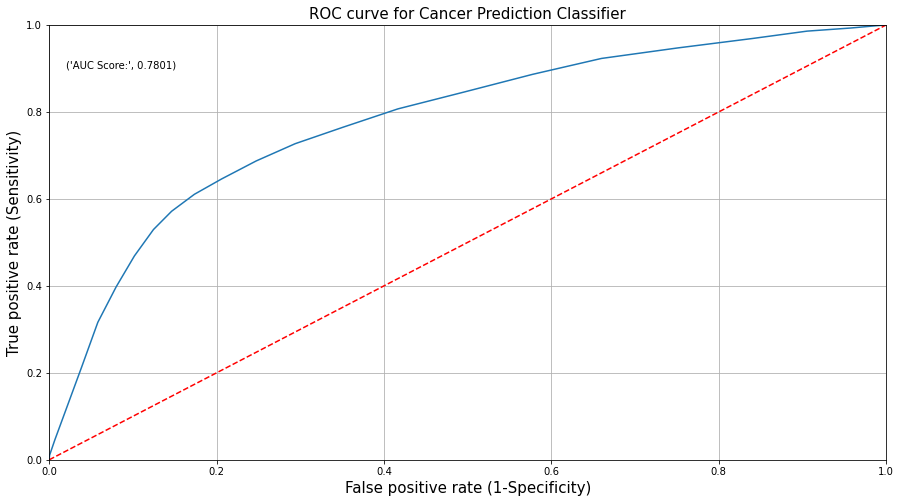

In [114]:
print(plot_roc(knn_model_tuned,xtest))

<a id='Naive'></a>
## 4.5 Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(xtrain, ytrain)

In [117]:
update_score_card_train(gnb_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646295,0.596504,0.906600,0.646455,0.292684,0.719565
1,DecisionTreeClassifier(),0.3,0.969142,0.945857,0.995328,0.969158,0.938314,0.969962
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.684826,0.634106,0.875401,0.684943,0.369739,0.735468
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.934238,0.888012,0.993982,0.934275,0.868540,0.938014
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.682913,0.629223,0.892228,0.683042,0.365921,0.737993
5,KNeighborsClassifier(n_neighbors=3),0.3,0.721995,0.643461,0.997228,0.722164,0.444140,0.782205
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.681657,0.625852,0.905016,0.681794,0.363413,0.739981
7,GaussianNB(),0.3,0.704830,0.718156,0.674823,0.704812,0.409645,0.695815


In [118]:
update_score_card_test(gnb_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646970,0.595904,0.909264,0.646700,0.293781,0.719965
1,DecisionTreeClassifier(),0.3,0.621848,0.615304,0.648001,0.621821,0.243682,0.631229
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.674084,0.623700,0.875000,0.673877,0.348023,0.728281
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.659576,0.614689,0.852316,0.659377,0.319025,0.714257
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.668477,0.616665,0.887532,0.668251,0.336802,0.727710
5,KNeighborsClassifier(n_neighbors=3),0.3,0.608162,0.568999,0.886263,0.607876,0.216200,0.693047
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.654466,0.605047,0.886263,0.654227,0.308784,0.719140
7,GaussianNB(),0.3,0.710932,0.721703,0.685755,0.710958,0.421886,0.703270


None


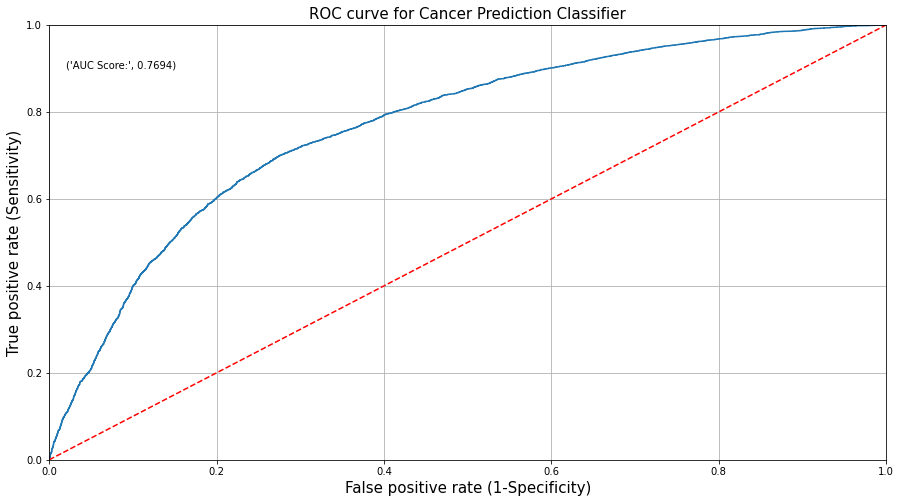

In [119]:
print(plot_roc(gnb_model,xtest))

<a id='ada'></a>
## 4.6 Adaptive Boosting

In [121]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(xtrain, ytrain)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [122]:
update_score_card_train(ada_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646295,0.596504,0.906600,0.646455,0.292684,0.719565
1,DecisionTreeClassifier(),0.3,0.969142,0.945857,0.995328,0.969158,0.938314,0.969962
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.684826,0.634106,0.875401,0.684943,0.369739,0.735468
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.934238,0.888012,0.993982,0.934275,0.868540,0.938014
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.682913,0.629223,0.892228,0.683042,0.365921,0.737993
5,KNeighborsClassifier(n_neighbors=3),0.3,0.721995,0.643461,0.997228,0.722164,0.444140,0.782205
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.681657,0.625852,0.905016,0.681794,0.363413,0.739981
7,GaussianNB(),0.3,0.704830,0.718156,0.674823,0.704812,0.409645,0.695815
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.3,0.500000,0.500307,1.000000,0.500307,0.000000,0.666940


In [123]:
update_score_card_test(ada_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646970,0.595904,0.909264,0.646700,0.293781,0.719965
1,DecisionTreeClassifier(),0.3,0.621848,0.615304,0.648001,0.621821,0.243682,0.631229
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.674084,0.623700,0.875000,0.673877,0.348023,0.728281
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.659576,0.614689,0.852316,0.659377,0.319025,0.714257
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.668477,0.616665,0.887532,0.668251,0.336802,0.727710
5,KNeighborsClassifier(n_neighbors=3),0.3,0.608162,0.568999,0.886263,0.607876,0.216200,0.693047
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.654466,0.605047,0.886263,0.654227,0.308784,0.719140
7,GaussianNB(),0.3,0.710932,0.721703,0.685755,0.710958,0.421886,0.703270
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.3,0.500000,0.499485,1.000000,0.499485,0.000000,0.666209


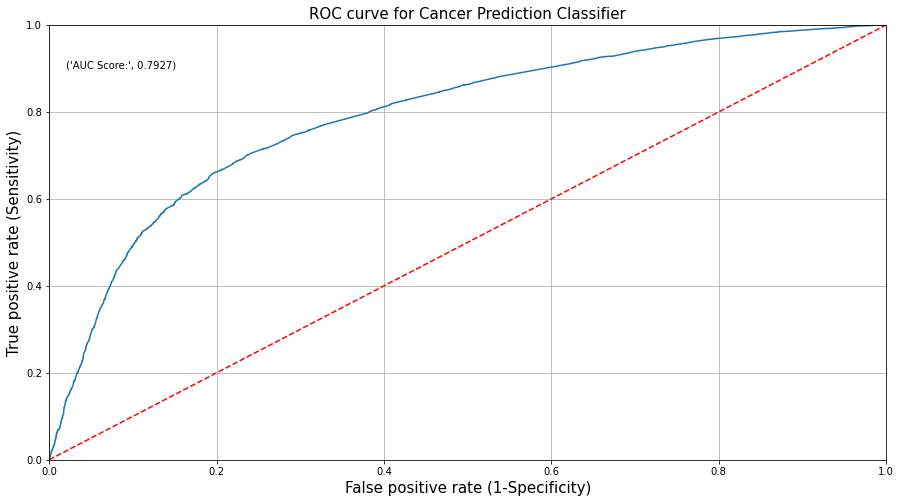

In [124]:
plot_roc(ada_model,xtest)

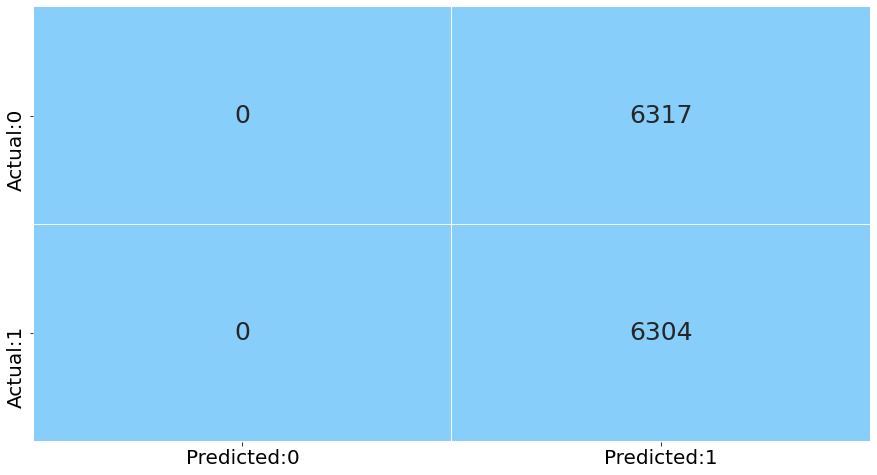

None


In [129]:
print(plot_confusion_matrix(ada_model,xtest,cutoff=0.3))

<a id='gra'></a>
## 4.7 Gradient Boosting classifier

In [125]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

gboost_model.fit(xtrain, ytrain)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [126]:
update_score_card_train(gboost_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646295,0.596504,0.906600,0.646455,0.292684,0.719565
1,DecisionTreeClassifier(),0.3,0.969142,0.945857,0.995328,0.969158,0.938314,0.969962
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.684826,0.634106,0.875401,0.684943,0.369739,0.735468
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.934238,0.888012,0.993982,0.934275,0.868540,0.938014
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.682913,0.629223,0.892228,0.683042,0.365921,0.737993
5,KNeighborsClassifier(n_neighbors=3),0.3,0.721995,0.643461,0.997228,0.722164,0.444140,0.782205
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.681657,0.625852,0.905016,0.681794,0.363413,0.739981
7,GaussianNB(),0.3,0.704830,0.718156,0.674823,0.704812,0.409645,0.695815
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.3,0.500000,0.500307,1.000000,0.500307,0.000000,0.666940
9,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,0.808743,0.743130,0.944293,0.808827,0.617590,0.831720


In [127]:
update_score_card_test(gboost_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646970,0.595904,0.909264,0.646700,0.293781,0.719965
1,DecisionTreeClassifier(),0.3,0.621848,0.615304,0.648001,0.621821,0.243682,0.631229
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.674084,0.623700,0.875000,0.673877,0.348023,0.728281
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.659576,0.614689,0.852316,0.659377,0.319025,0.714257
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.668477,0.616665,0.887532,0.668251,0.336802,0.727710
5,KNeighborsClassifier(n_neighbors=3),0.3,0.608162,0.568999,0.886263,0.607876,0.216200,0.693047
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.654466,0.605047,0.886263,0.654227,0.308784,0.719140
7,GaussianNB(),0.3,0.710932,0.721703,0.685755,0.710958,0.421886,0.703270
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.3,0.500000,0.499485,1.000000,0.499485,0.000000,0.666209
9,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,0.673662,0.628005,0.849461,0.673481,0.347198,0.722136


<a id='XG'></a>
## 4.7  XGBoostingClassifier

In [130]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(xtrain, ytrain)

[13:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
update_score_card_train(xgb_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646295,0.596504,0.906600,0.646455,0.292684,0.719565
1,DecisionTreeClassifier(),0.3,0.969142,0.945857,0.995328,0.969158,0.938314,0.969962
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.684826,0.634106,0.875401,0.684943,0.369739,0.735468
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.934238,0.888012,0.993982,0.934275,0.868540,0.938014
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.682913,0.629223,0.892228,0.683042,0.365921,0.737993
5,KNeighborsClassifier(n_neighbors=3),0.3,0.721995,0.643461,0.997228,0.722164,0.444140,0.782205
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.681657,0.625852,0.905016,0.681794,0.363413,0.739981
7,GaussianNB(),0.3,0.704830,0.718156,0.674823,0.704812,0.409645,0.695815
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.3,0.500000,0.500307,1.000000,0.500307,0.000000,0.666940
9,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,0.808743,0.743130,0.944293,0.808827,0.617590,0.831720


In [132]:
update_score_card_test(xgb_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646970,0.595904,0.909264,0.646700,0.293781,0.719965
1,DecisionTreeClassifier(),0.3,0.621848,0.615304,0.648001,0.621821,0.243682,0.631229
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.674084,0.623700,0.875000,0.673877,0.348023,0.728281
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.659576,0.614689,0.852316,0.659377,0.319025,0.714257
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.668477,0.616665,0.887532,0.668251,0.336802,0.727710
5,KNeighborsClassifier(n_neighbors=3),0.3,0.608162,0.568999,0.886263,0.607876,0.216200,0.693047
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.654466,0.605047,0.886263,0.654227,0.308784,0.719140
7,GaussianNB(),0.3,0.710932,0.721703,0.685755,0.710958,0.421886,0.703270
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.3,0.500000,0.499485,1.000000,0.499485,0.000000,0.666209
9,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,0.673662,0.628005,0.849461,0.673481,0.347198,0.722136


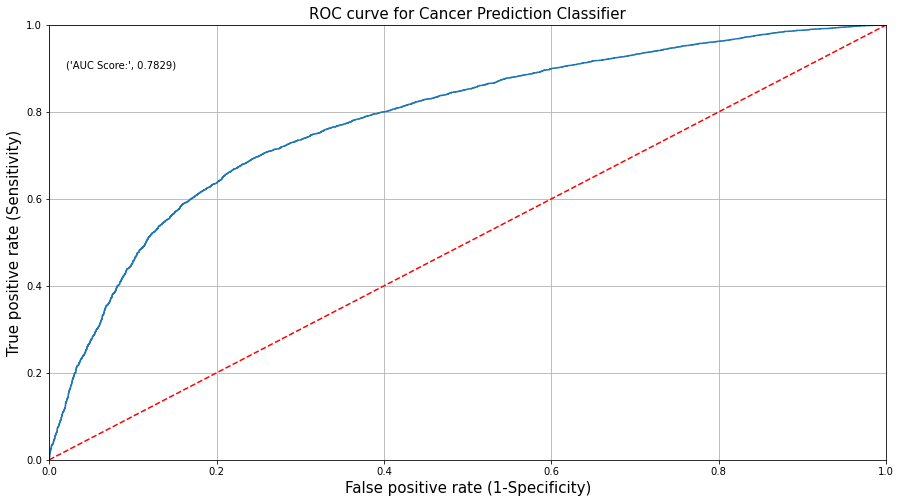

In [133]:
plot_roc(xgb_model,xtest)

In [ ]:
#tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
#                     'max_depth': range(3,10),
#                     'gamma': [0, 1, 2, 3, 4]} 
#xgb_model = XGBClassifier()
#xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
#xgb_grid.fit(xtrain, ytrain)
#print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

In [134]:
xgb_grid_model = XGBClassifier(learning_rate =0.2,
                               max_depth = 4,
                              gamma = 4)
xgb_model = xgb_grid_model.fit(xtrain, ytrain)

[13:42:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [135]:
update_score_card_test(xgb_model,cutoff=0.3)

,Model,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,LogisticRegression(),0.3,0.646970,0.595904,0.909264,0.646700,0.293781,0.719965
1,DecisionTreeClassifier(),0.3,0.621848,0.615304,0.648001,0.621821,0.243682,0.631229
2,"DecisionTreeClassifier(max_depth=9, min_sample...",0.3,0.674084,0.623700,0.875000,0.673877,0.348023,0.728281
3,"(DecisionTreeClassifier(max_features='auto', r...",0.3,0.659576,0.614689,0.852316,0.659377,0.319025,0.714257
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.3,0.668477,0.616665,0.887532,0.668251,0.336802,0.727710
5,KNeighborsClassifier(n_neighbors=3),0.3,0.608162,0.568999,0.886263,0.607876,0.216200,0.693047
6,"KNeighborsClassifier(metric='euclidean', n_nei...",0.3,0.654466,0.605047,0.886263,0.654227,0.308784,0.719140
7,GaussianNB(),0.3,0.710932,0.721703,0.685755,0.710958,0.421886,0.703270
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.3,0.500000,0.499485,1.000000,0.499485,0.000000,0.666209
9,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,0.673662,0.628005,0.849461,0.673481,0.347198,0.722136


<a id='svm'></a>
## 4.8 Support Vector Machine

In [139]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(xtrain, ytrain)

SVC()

In [142]:
def get_train_report(model):
    train_pred = model.predict(xtrain)
    return(classification_report(ytrain, train_pred))

print(get_train_report(svc))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     25226
           1       0.77      0.67      0.72     25257

    accuracy                           0.73     50483
   macro avg       0.74      0.73      0.73     50483
weighted avg       0.74      0.73      0.73     50483



In [143]:
def get_test_report(model):
    test_pred = model.predict(xtest)
    return(classification_report(ytest, test_pred))

print(get_test_report(svc))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6317
           1       0.76      0.68      0.72      6304

    accuracy                           0.73     12621
   macro avg       0.74      0.73      0.73     12621
weighted avg       0.74      0.73      0.73     12621



In [144]:
cov_mat = np.cov(df_final.T)
print(cov_mat[0:5])

[[ 1.00001585 -0.09272098  0.04781232  0.19799288  0.14291662  0.1050565
   0.01445863  0.00739045  0.0477814   0.00641975  0.02448026 -0.01386667
  -0.00642585 -0.00362084]
 [-0.09272098  1.00001585  0.37151889  0.00232163  0.01854756 -0.1786014
  -0.25021851 -0.0087164  -0.01433371 -0.00322586 -0.00427647  0.0555617
   0.02213695 -0.00424321]
 [ 0.04781232  0.37151889  1.00001585  0.23486104  0.22038366  0.84308698
  -0.09554242  0.02278802  0.03190829  0.02268686  0.01479031  0.02329948
   0.01663996 -0.00510158]
 [ 0.19799288  0.00232163  0.23486104  1.00001585  0.71536702  0.24644695
  -0.02550155  0.03700405  0.04716909  0.01948543  0.01490469  0.00798508
   0.00723043  0.00060767]
 [ 0.14291662  0.01854756  0.22038366  0.71536702  1.00001585  0.22175887
  -0.02736012  0.0293563   0.03966417  0.01666437  0.01073936  0.00767543
   0.0080917   0.00020829]]


In [145]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [2.3060921  1.4085141  1.19061184 0.89682331 0.28236991 0.1691621
 0.14145538 0.15681238 0.10484252 0.00350995 0.07525477 0.05812805
 0.04004877 0.03863629] 

Eigenvectors: 
 
 [[ 0.17663694 -0.33191611  0.15284251  0.91073685  0.05619957 -0.0008432
   0.03816971 -0.00010363 -0.02973824  0.00097758 -0.01724986  0.00295376
  -0.00428684  0.00162075]
 [ 0.08029486  0.47721003 -0.70089602  0.27570298 -0.00363892  0.24179599
   0.02418907 -0.0703058   0.01515385 -0.36501635 -0.03243764 -0.00305364
   0.00390673 -0.00245706]
 [ 0.52284211  0.50066709  0.09479208  0.06295324  0.00859047  0.05778357
   0.00928652 -0.0189287  -0.01477857  0.67739995 -0.00562946  0.00631968
   0.00038305 -0.00134237]
 [ 0.4692481  -0.41143448 -0.27298018 -0.15258411 -0.7135464   0.02999822
  -0.00619899 -0.00374057 -0.05001238 -0.00036448 -0.0035357   0.00177876
  -0.00963779  0.00413548]
 [ 0.45486636 -0.3999034  -0.31076945 -0.2251166   0.69700607  0.00309324
   0.00515553 -0.00170323 -0.0010

In [146]:
eig_val = list(eig_val)
eig_val.sort(reverse = True)
print(eig_val)

[2.3060921026546612, 1.4085140997379701, 1.1906118350371735, 0.8968233105399697, 0.28236991215720286, 0.16916210101466847, 0.15681238094403702, 0.14145538030751073, 0.10484252031243795, 0.07525476764172197, 0.05812805025876632, 0.0400487746314543, 0.03863629101963921, 0.003509947528484583]


In [147]:
percent_var = []
for i in eig_val:
    variation = (i/sum(eig_val))*100
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[33.55652446361754,
 20.49564186564728,
 17.32489137060301,
 13.0499008799492,
 4.108835399152162,
 2.4615201511167584,
 2.281816277541232,
 2.058352710342782,
 1.5255898034782387,
 1.0950509949131293,
 0.8458358355615002,
 0.5827597623318133,
 0.5622063591005332,
 0.05107412664482149]

In [148]:
np.cumsum(percent_var)

array([ 33.55652446,  54.05216633,  71.3770577 ,  84.42695858,
        88.53579398,  90.99731413,  93.27913041,  95.33748312,
        96.86307292,  97.95812392,  98.80395975,  99.38671951,
        99.94892587, 100.        ])

In [149]:
#90% variation in data is showed by 6 components
eig_val

[2.3060921026546612,
 1.4085140997379701,
 1.1906118350371735,
 0.8968233105399697,
 0.28236991215720286,
 0.16916210101466847,
 0.15681238094403702,
 0.14145538030751073,
 0.10484252031243795,
 0.07525476764172197,
 0.05812805025876632,
 0.0400487746314543,
 0.03863629101963921,
 0.003509947528484583]

In [150]:
from sklearn.decomposition import PCA
pca = PCA(n_components =8, random_state = 10)
components = pca.fit_transform(df_final)

In [151]:
pca = PCA(n_components =8, random_state = 10)
xtrain = pca.fit_transform(xtrain)
xtest=pca.transform(xtest)

In [152]:
LR=LogisticRegression()
LR.fit(xtrain,ytrain)

LogisticRegression()

In [153]:
print(get_train_report(LR))
print(get_test_report(LR))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     25226
           1       0.75      0.66      0.70     25257

    accuracy                           0.72     50483
   macro avg       0.72      0.72      0.72     50483
weighted avg       0.72      0.72      0.72     50483

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      6317
           1       0.75      0.67      0.71      6304

    accuracy                           0.72     12621
   macro avg       0.72      0.72      0.72     12621
weighted avg       0.72      0.72      0.72     12621



In [154]:
DT = DecisionTreeClassifier()
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [155]:
print(get_train_report(DT))
print(get_test_report(DT))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     25226
           1       0.99      0.95      0.97     25257

    accuracy                           0.97     50483
   macro avg       0.97      0.97      0.97     50483
weighted avg       0.97      0.97      0.97     50483

              precision    recall  f1-score   support

           0       0.63      0.64      0.64      6317
           1       0.63      0.62      0.63      6304

    accuracy                           0.63     12621
   macro avg       0.63      0.63      0.63     12621
weighted avg       0.63      0.63      0.63     12621



In [156]:
RF = RandomForestClassifier()
RF.fit(xtrain,ytrain)

RandomForestClassifier()

In [157]:
print(get_train_report(RF))
print(get_test_report(RF))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     25226
           1       0.98      0.97      0.97     25257

    accuracy                           0.97     50483
   macro avg       0.97      0.97      0.97     50483
weighted avg       0.97      0.97      0.97     50483

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      6317
           1       0.70      0.71      0.71      6304

    accuracy                           0.70     12621
   macro avg       0.70      0.70      0.70     12621
weighted avg       0.70      0.70      0.70     12621



In [158]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(xtrain, ytrain)

In [159]:
print(get_train_report(knn_model))
print(get_test_report(knn_model))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     25226
           1       0.82      0.81      0.82     25257

    accuracy                           0.82     50483
   macro avg       0.82      0.82      0.82     50483
weighted avg       0.82      0.82      0.82     50483

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      6317
           1       0.67      0.67      0.67      6304

    accuracy                           0.67     12621
   macro avg       0.67      0.67      0.67     12621
weighted avg       0.67      0.67      0.67     12621



In [160]:
gnb = GaussianNB()
gnb_model = gnb.fit(xtrain, ytrain)



In [161]:
print(get_train_report(gnb_model))
print(get_test_report(gnb_model))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72     25226
           1       0.73      0.62      0.67     25257

    accuracy                           0.70     50483
   macro avg       0.70      0.70      0.70     50483
weighted avg       0.70      0.70      0.70     50483

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      6317
           1       0.74      0.64      0.68      6304

    accuracy                           0.71     12621
   macro avg       0.71      0.71      0.70     12621
weighted avg       0.71      0.71      0.70     12621

